In [237]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader, TensorDataset
      

class AutoEncoder(nn.Module):
    '''
    A class representing a fully-connect AutoEncoder.
    '''
    def __init__(self):
        super().__init__()
        self.encoder = nn.Sequential(
                nn.Linear(784, 16),
                nn.ReLU(),
                nn.BatchNorm1d(16),
                nn.Linear(16, 16),
                nn.ReLU()
        )
        
        self.decoder = nn.Sequential(
                nn.BatchNorm1d(16),
                nn.Linear(16, 784),
                nn.Sigmoid()
            )
                

    def forward(self, x):
        self.encoded = self.encoder(x)
        self.decoded = self.decoder(self.encoded)
        
        return self.decoded

In [245]:
# Read the data in
data = pd.read_csv('./data/mnist_train.csv')

# Extract the X and y training data and normalise.
X_train = data[data.columns[1:]].as_matrix()/255
y_train = data['5'].as_matrix()

# Convert into PyTorch tensors.
X_train_tensor = torch.Tensor(X_train)
y_train_tensor = torch.Tensor(y_train)

# Define the batch size and number of epochs.
batch_size = 64
epochs = 10

# Create data loader.
train_data = TensorDataset(X_train_tensor, y_train_tensor)
train_data_loader = DataLoader(train_data, batch_size, shuffle=True)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [246]:
# Instantiate AutoEncoder
ae = AutoEncoder()

# Instantiate Loss
criterion = nn.BCELoss()

# Instantiate Adam Optimiser
optimizer = torch.optim.Adam(ae.parameters())

Epoch 0: loss = 0.164966
Epoch 1: loss = 0.139051
Epoch 2: loss = 0.129212
Epoch 3: loss = 0.142989
Epoch 4: loss = 0.153036
Epoch 5: loss = 0.144417
Epoch 6: loss = 0.138340
Epoch 7: loss = 0.153945
Epoch 8: loss = 0.133233
Epoch 9: loss = 0.139437


<IPython.core.display.Javascript object>


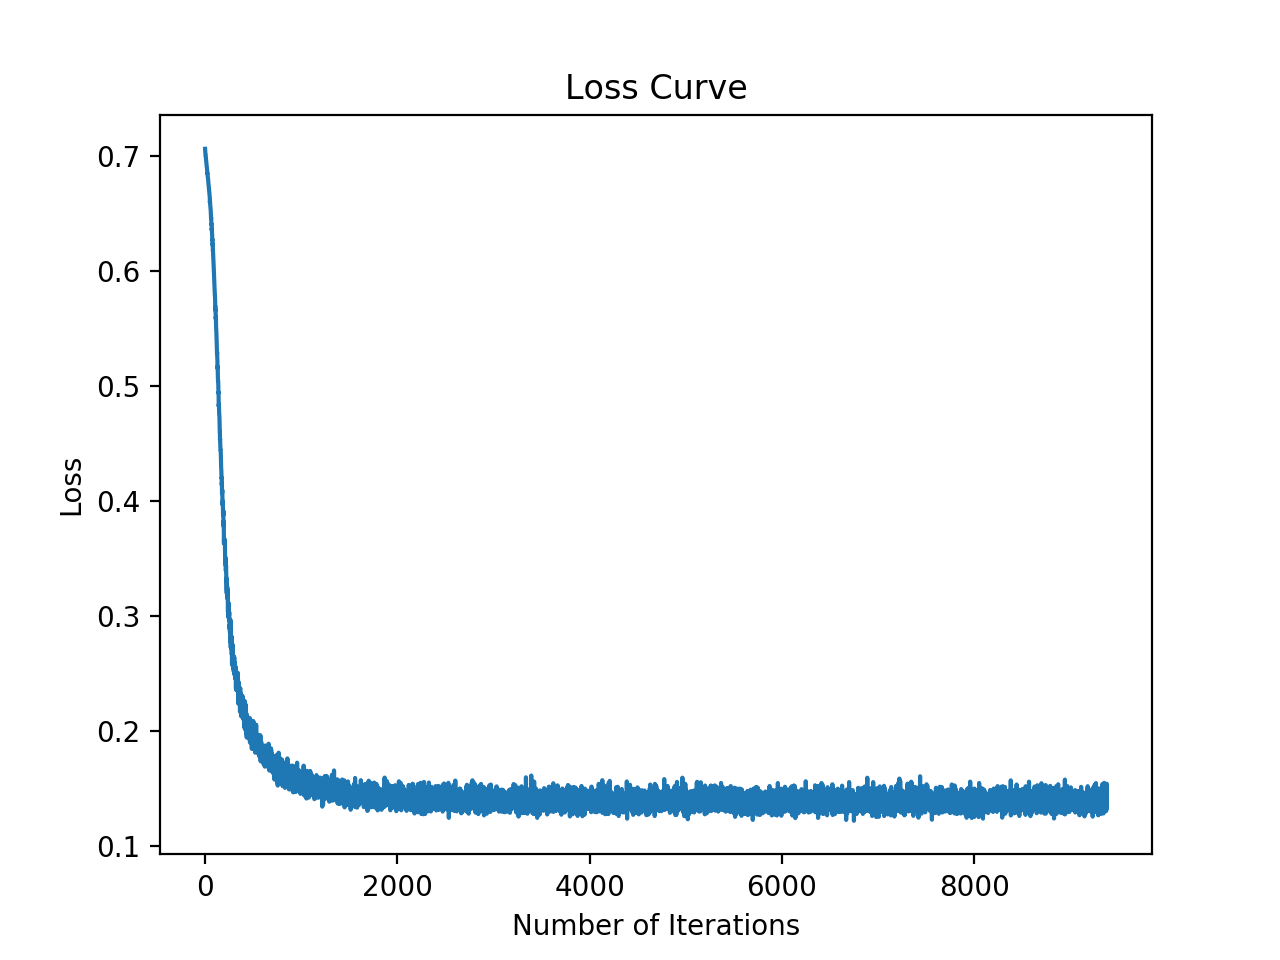

In [247]:
%matplotlib notebook
losses = []

# For each epoch
for epoch in range(epochs):
    
    # For each batch in the data loader
    for features, labels in train_data_loader:
        # Flatten the features
        flatten_features = features.view(features.size(0), -1)
        
        # Pass through the AutoEncoder
        output = ae(flatten_features)

        # Reset optimiser gradients
        optimizer.zero_grad()
        
        # Calculate loss between AE output and input
        loss = criterion(output, flatten_features)
        
        # Calculate gradients
        loss.backward()
        
        # Update Parameters
        optimizer.step()
        
        losses.append(loss)
    
    print('Epoch %d: loss = %f' % (epoch, loss))
    
plt.plot(range(len(losses)), losses)
plt.title('Loss Curve')
plt.xlabel('Number of Iterations')
plt.ylabel('Loss')
plt.show()

<IPython.core.display.Javascript object>


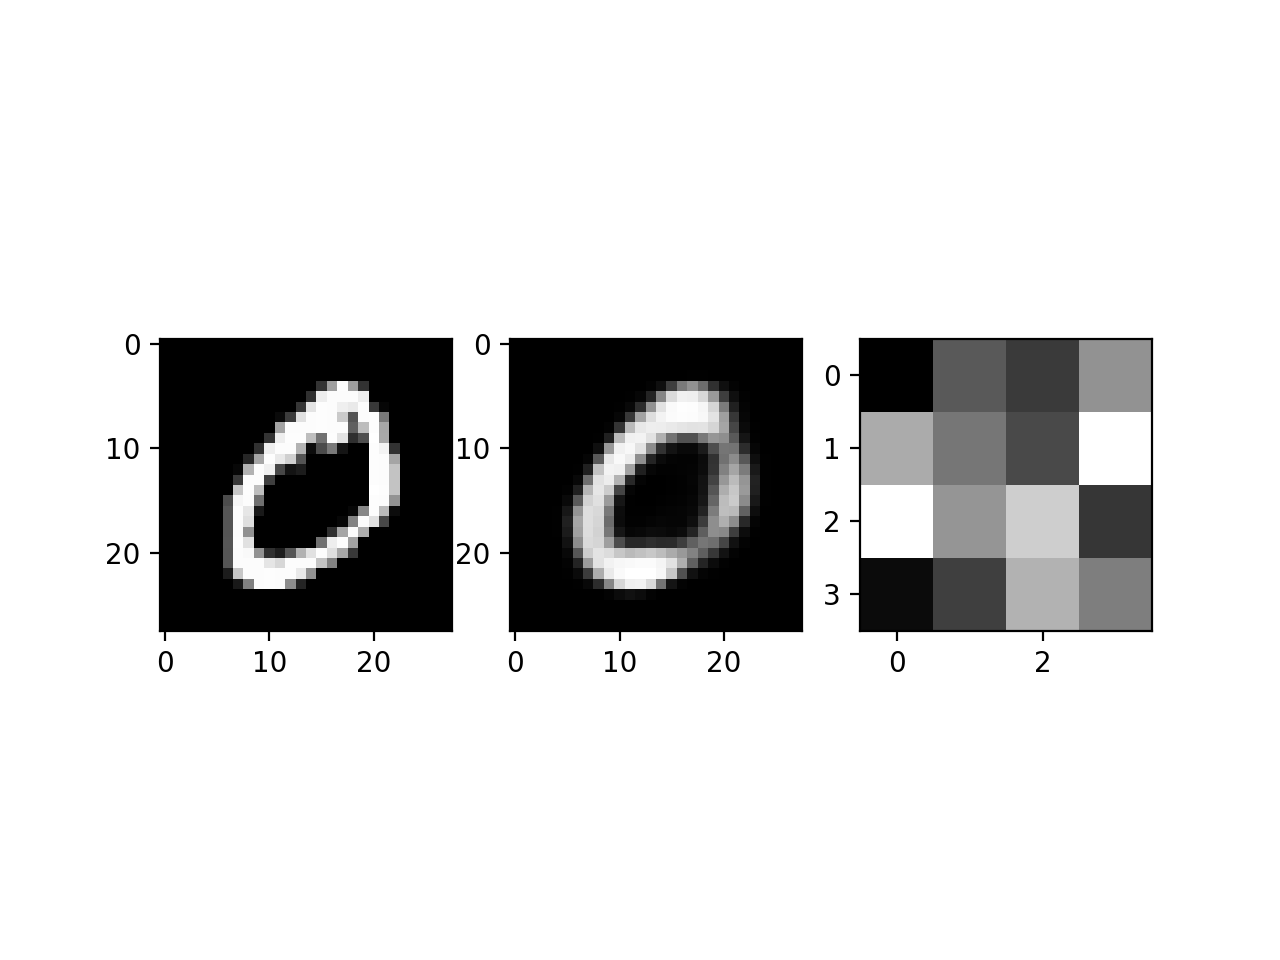

<IPython.core.display.Javascript object>


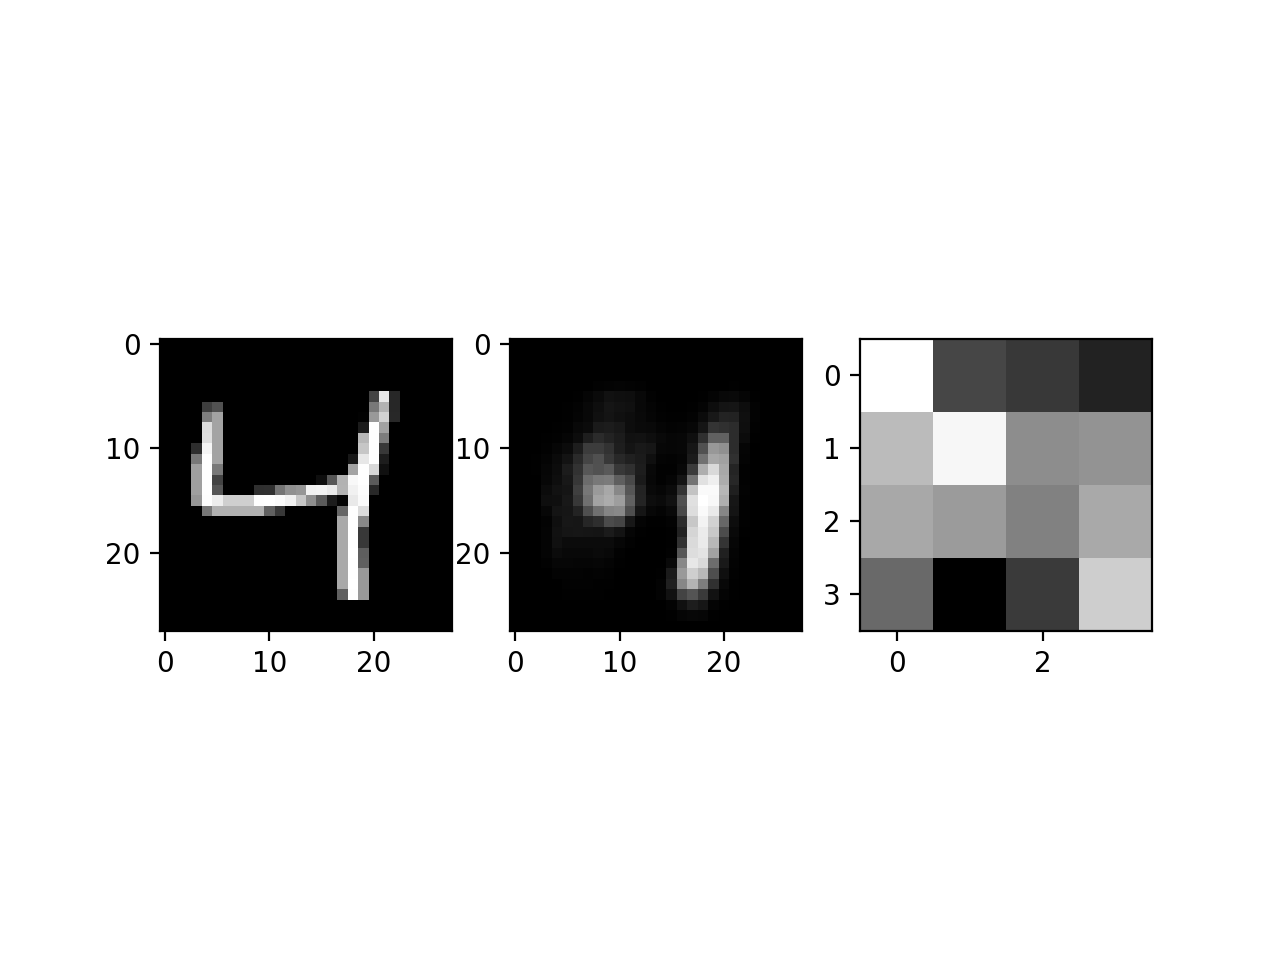

<IPython.core.display.Javascript object>


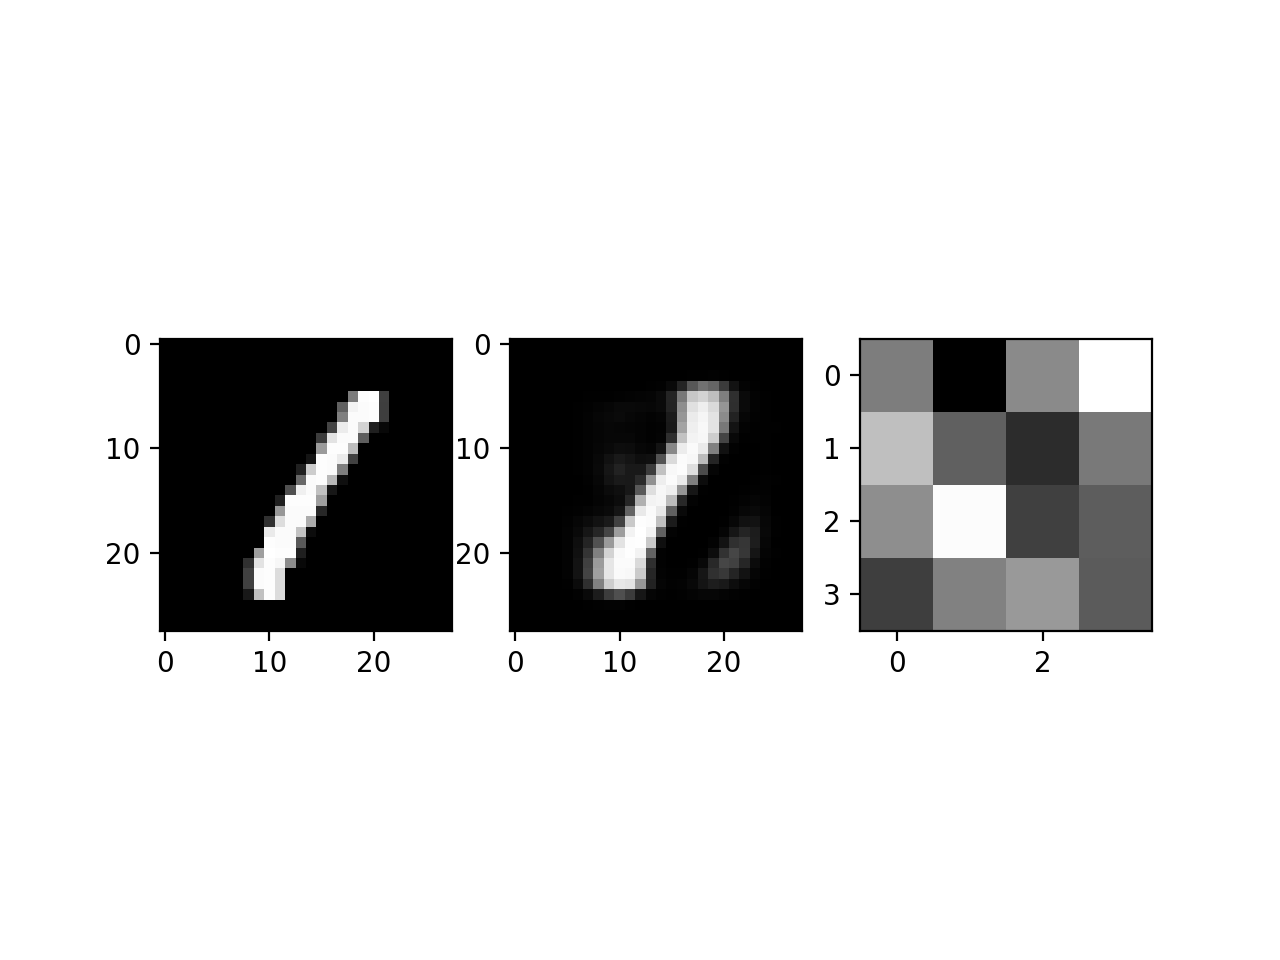

<IPython.core.display.Javascript object>


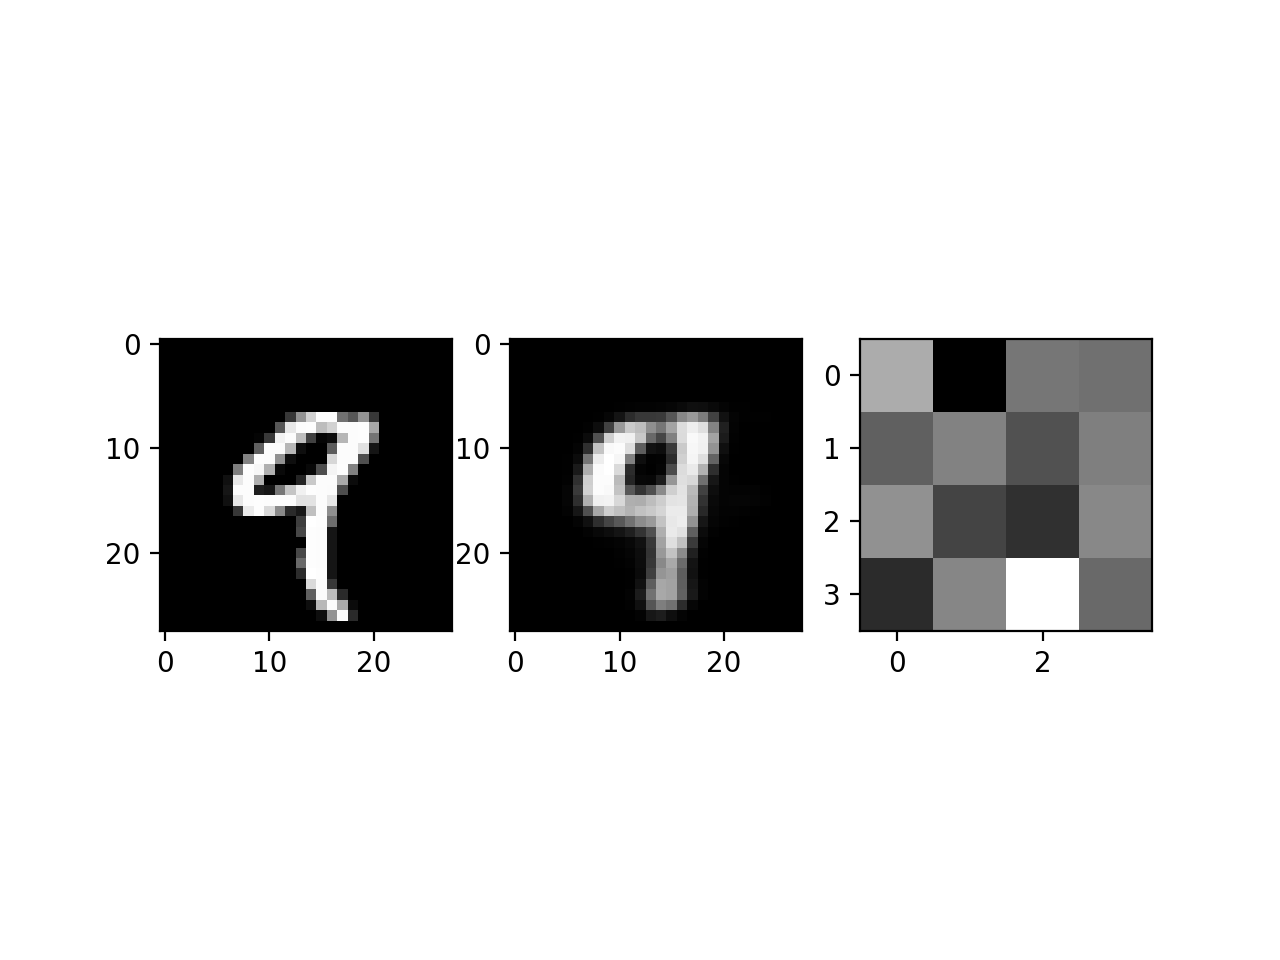

<IPython.core.display.Javascript object>


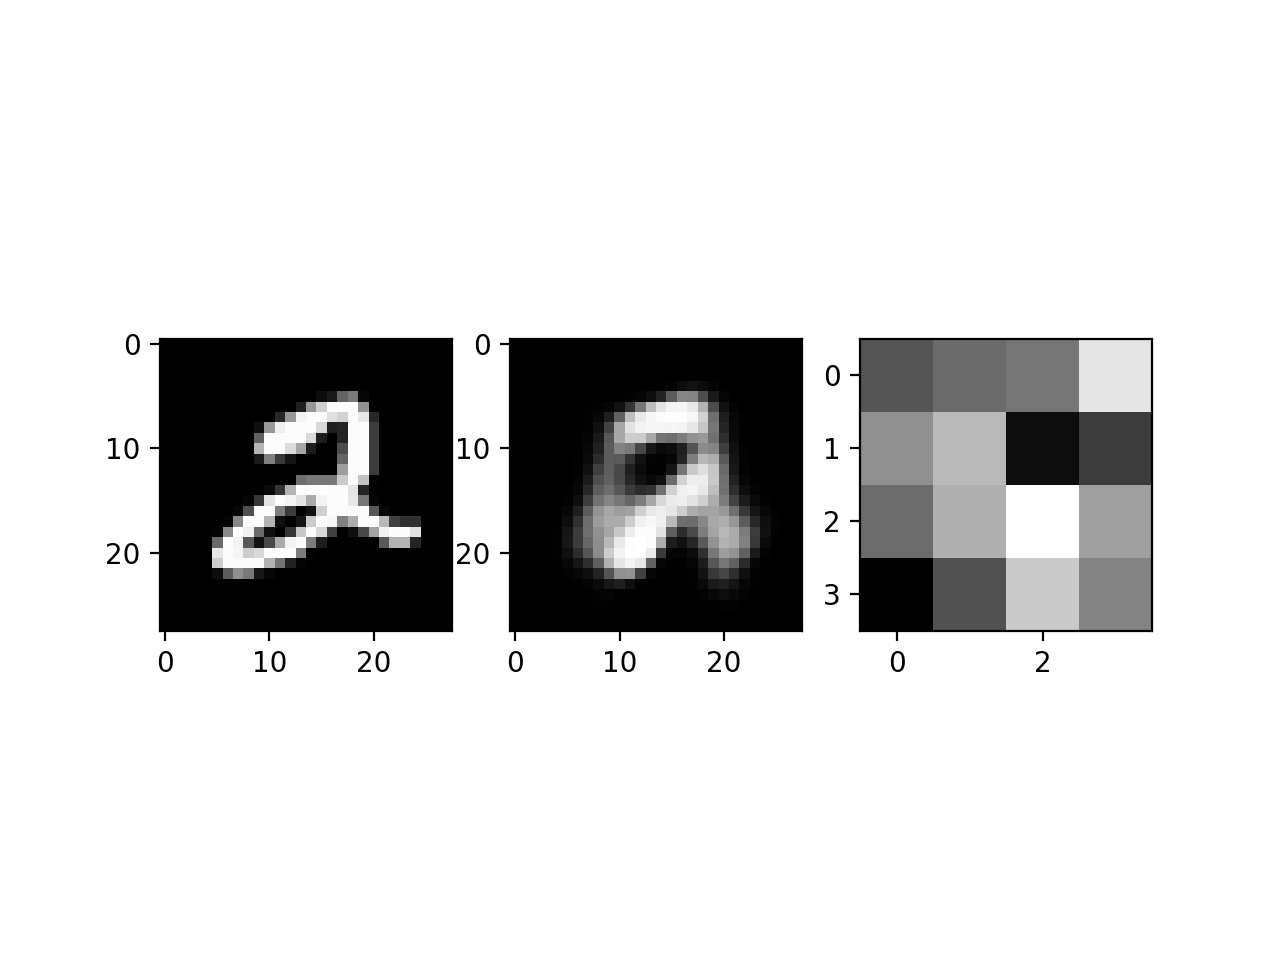

<IPython.core.display.Javascript object>


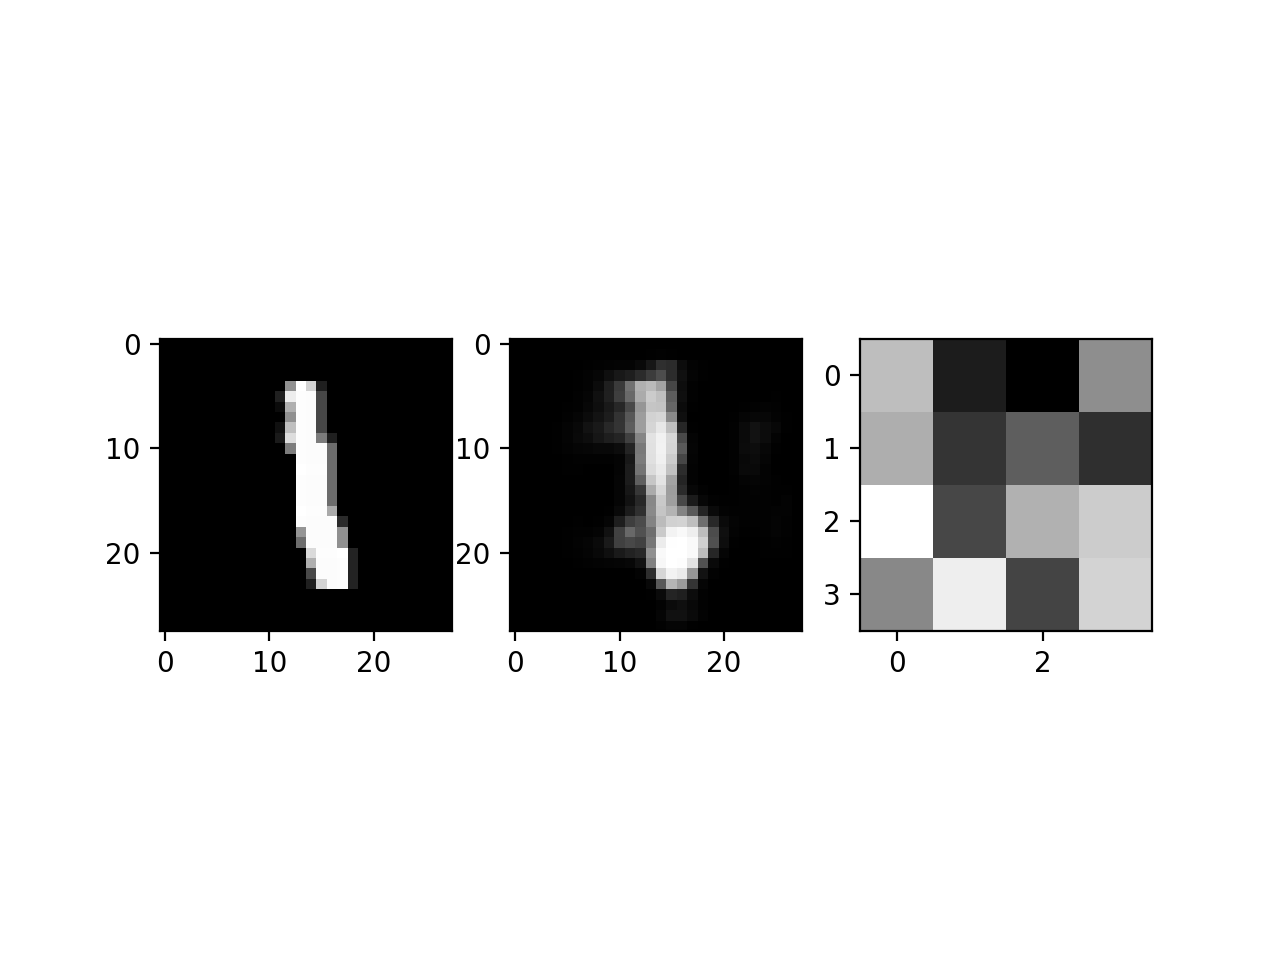

<IPython.core.display.Javascript object>


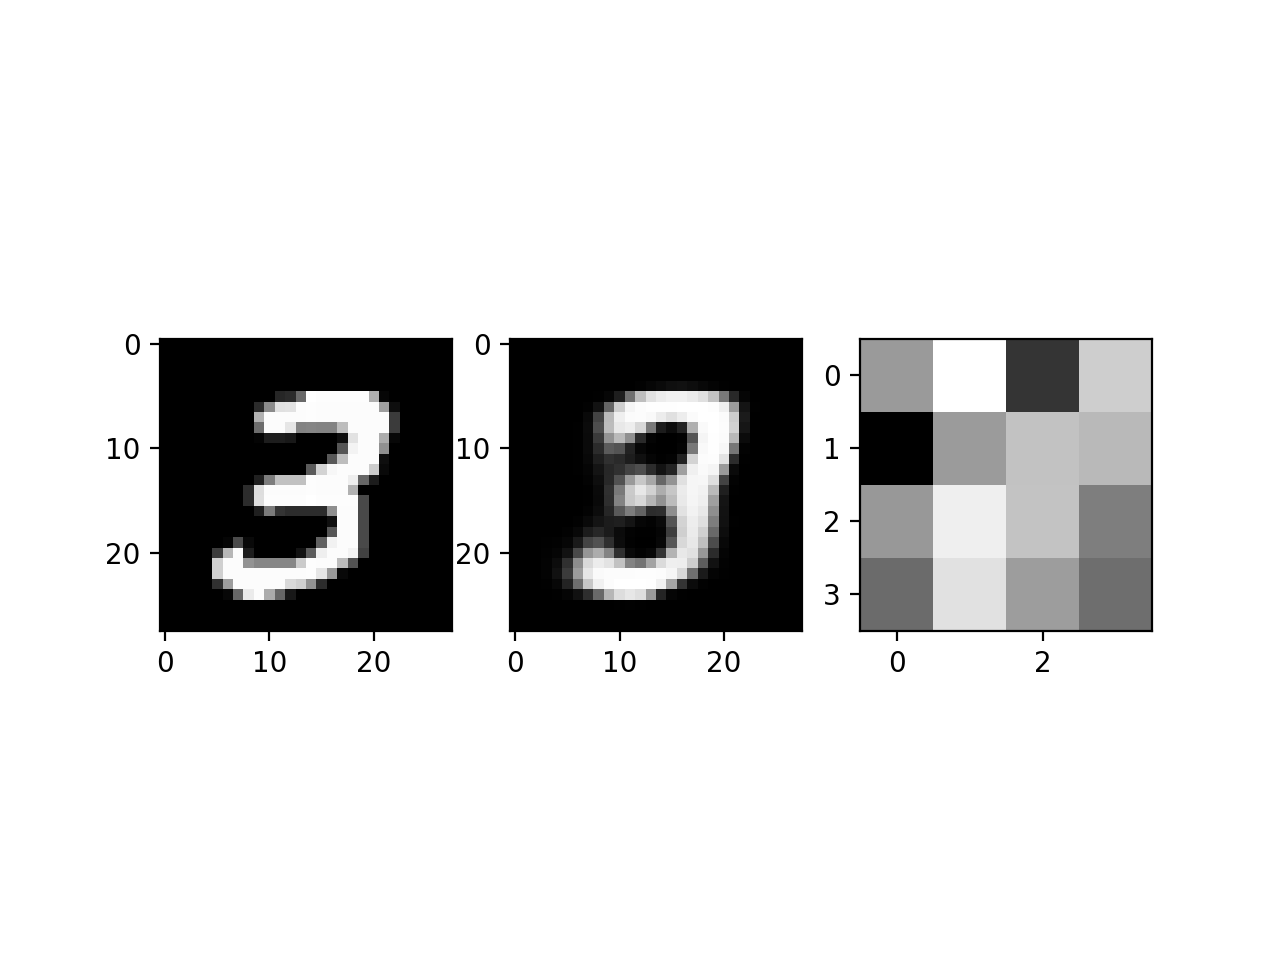

<IPython.core.display.Javascript object>


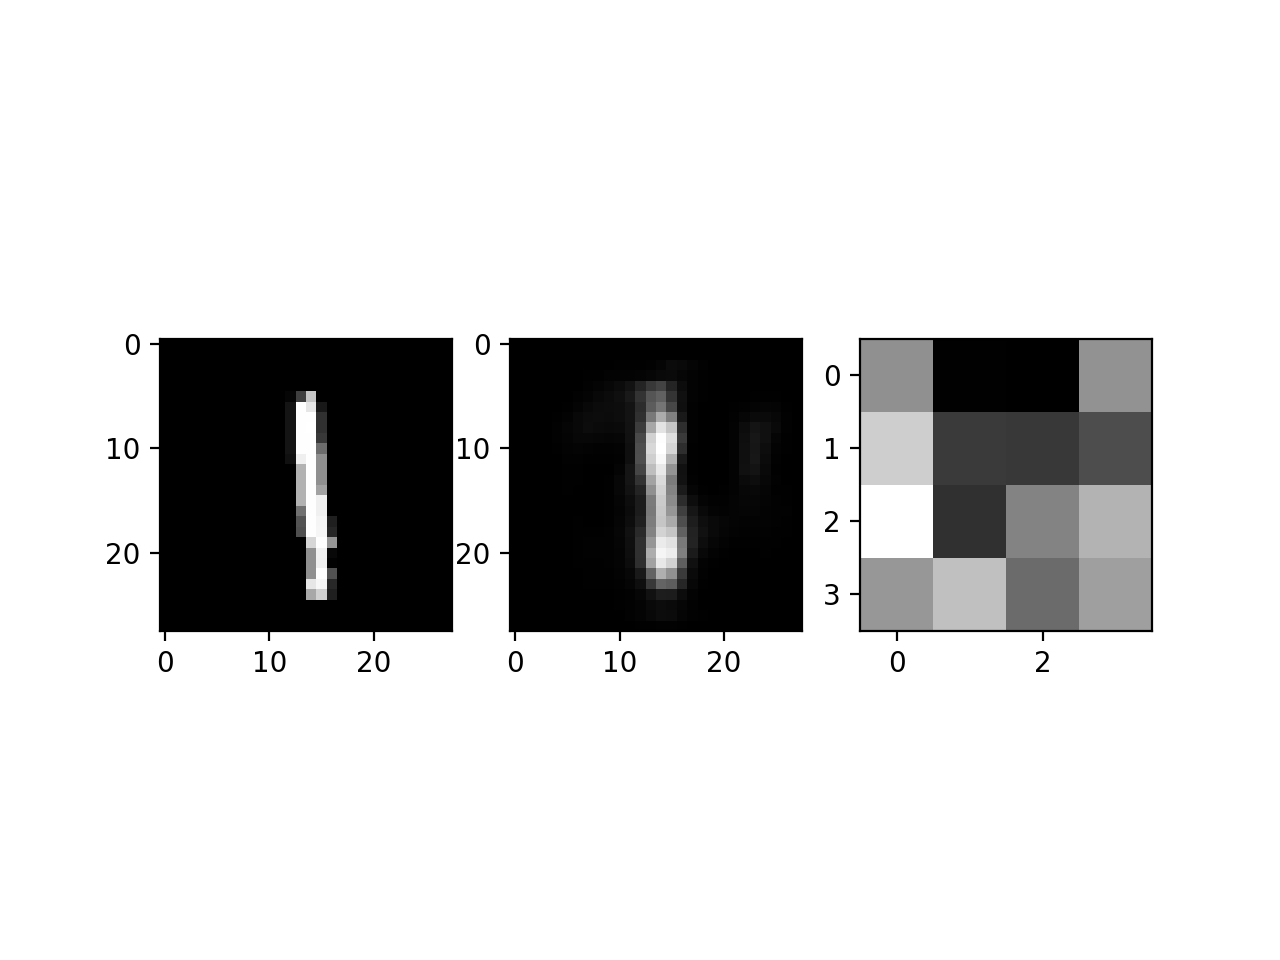

<IPython.core.display.Javascript object>


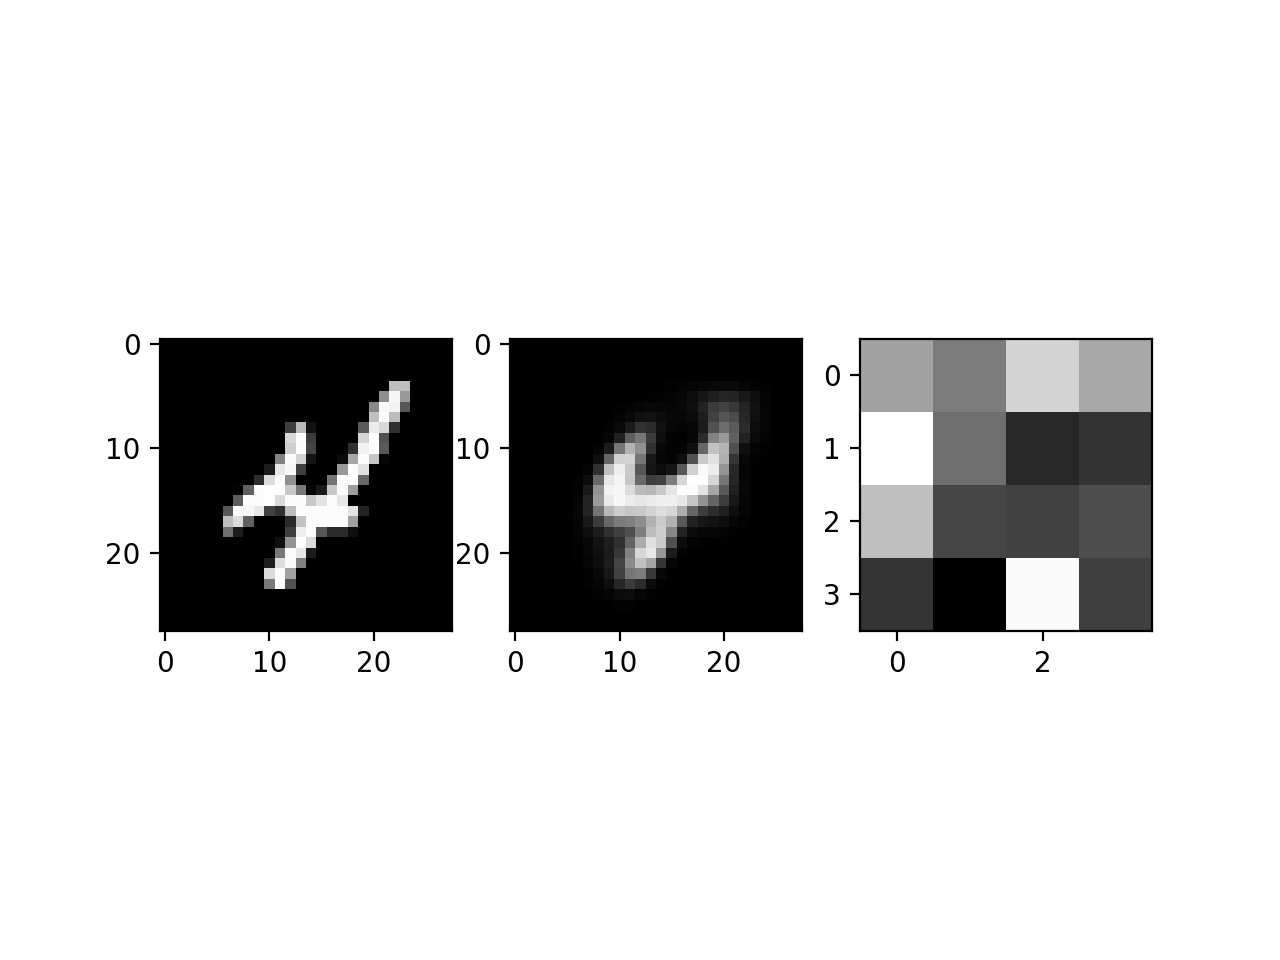

<IPython.core.display.Javascript object>


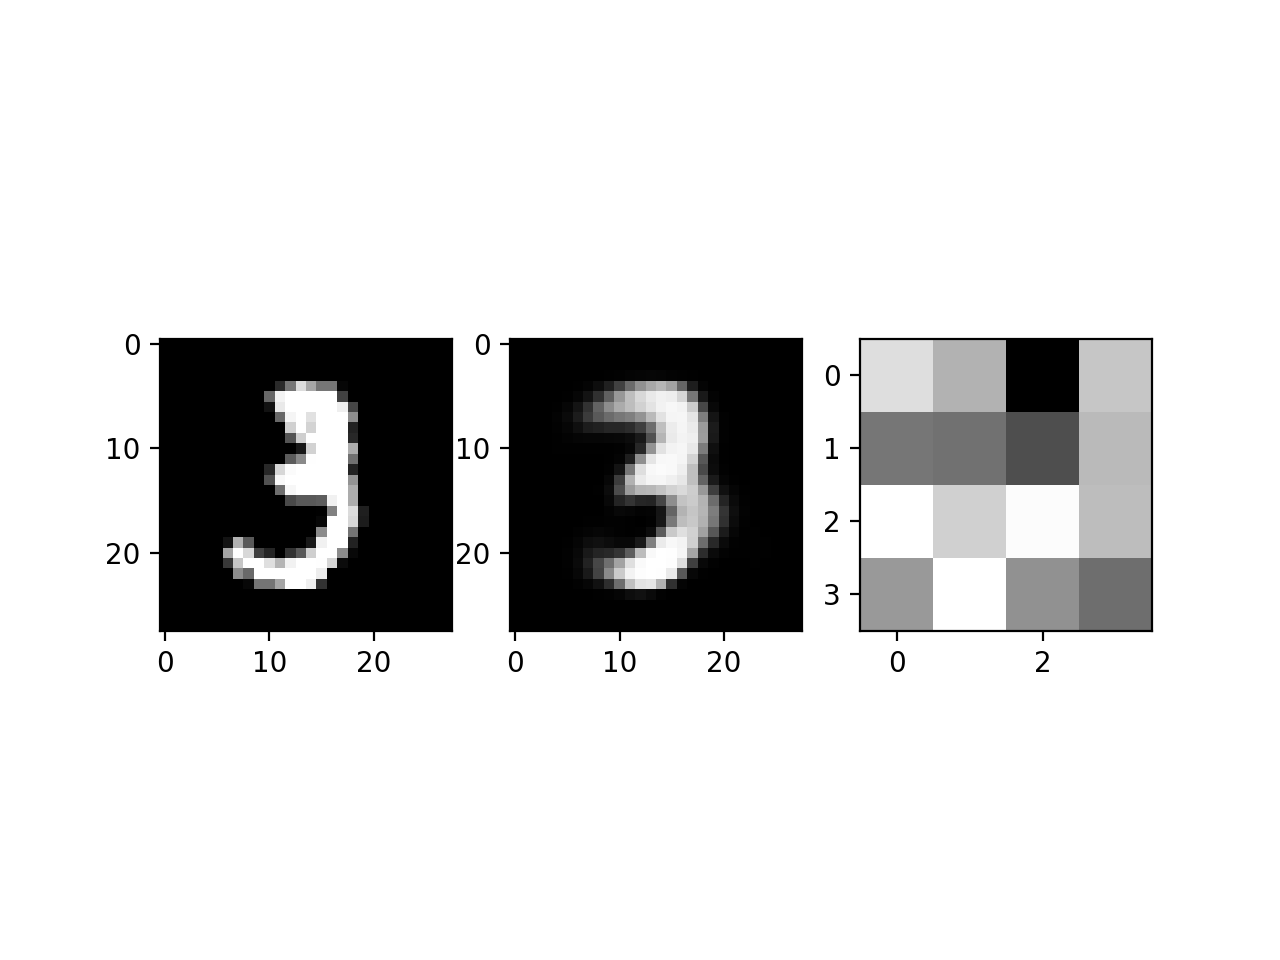

In [248]:
# Extract ten examples
examples = X_train_tensor[:10]

# Flatten the ten examples
examples_flatten = examples.view(examples.size(0), -1)

# Pass them through the trained AE.
predictions = ae(examples_flatten)

# Extract their encodings
encodings = ae.encoded

encodings = encodings.view(-1, 4, 4)
predictions = predictions.view(-1, 28, 28)

# Display Image, Reconstruction, and Encoding
for i in range(10):
    fig, ax = plt.subplots(1, 3)
    ax[0].imshow(examples[i].view(28, 28), cmap='gray')
    ax[1].imshow(predictions[i].detach().numpy(), cmap='gray')
    ax[2].imshow(encodings[i].detach().numpy(), cmap='gray')
    plt.show()


In [242]:
class ConvolutionalAutoEncoder(nn.Module):
    '''
    A class that represents a Convolutional AutoEncoder
    '''
    def __init__(self):
        super().__init__()
        self.encoder = nn.Sequential(
                nn.Conv2d(1, 16, kernel_size=3, stride=1),
                nn.ReLU(),
                nn.BatchNorm2d(16),
        )
        
        self.decoder = nn.Sequential(
                nn.ConvTranspose2d(16, 1, kernel_size=3, stride=1),
                nn.Sigmoid(),
            )
                

    def forward(self, x):
        self.encoded = self.encoder(x)
        self.decoded = self.decoder(self.encoded)
        
        return self.decoded

Epoch 0: loss = 0.092392
Epoch 1: loss = 0.082514
Epoch 2: loss = 0.088377
Epoch 3: loss = 0.080599
Epoch 4: loss = 0.083771


<IPython.core.display.Javascript object>


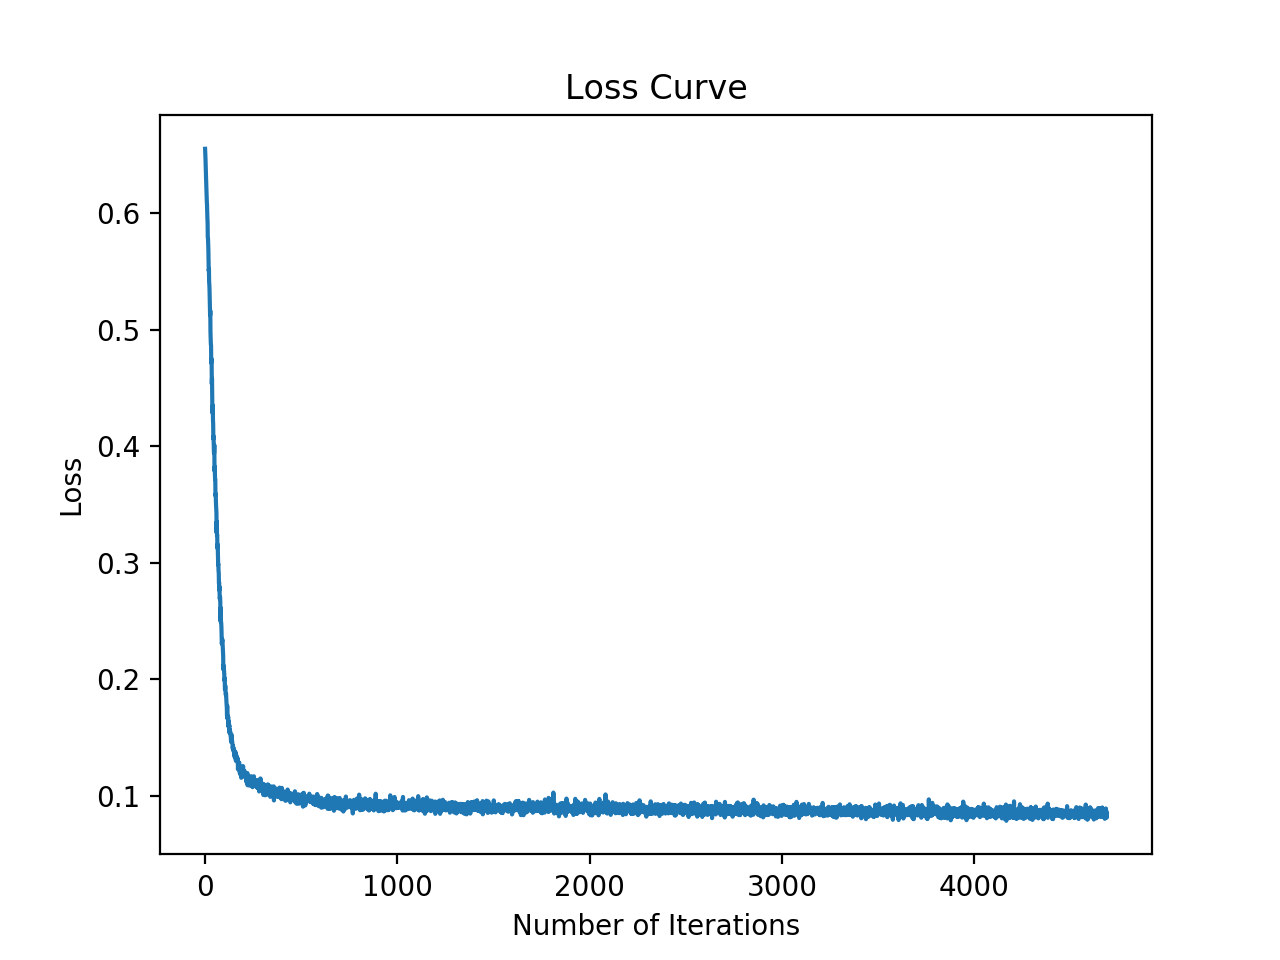

In [243]:
%matplotlib notebook
losses = []

# Instantiate CAE
ae = ConvolutionalAutoEncoder()

# Instantiate Loss
criterion = nn.BCELoss()

# Instantiate Adam Optimiser
optimizer = torch.optim.Adam(ae.parameters())

# For each epoch
for epoch in range(5):
    
    # For each batch
    for features, labels in train_data_loader:
        # Reshape into an image that can be passed through a CNN.
        features = features.view(features.size(0), 1, 28, 28)
        
        # Generate Gaussian noise
        noise = torch.tensor(np.random.randn(features.size(0), 784)).view(-1, 1, 28, 28).type(torch.FloatTensor)
        
        # Distort the images
        features_noise = features + noise * 0.3
        
        # Pass through the CAE
        output = ae(features_noise)

        # Reset optimiser gradients
        optimizer.zero_grad()
        
        # Calculate loss between the noisy images and original images
        loss = criterion(output, features)
        
        # Calculate gradients
        loss.backward()
        
        # Update parameters
        optimizer.step()
        
        losses.append(loss)
    
    print('Epoch %d: loss = %f' % (epoch, loss))
    
plt.plot(range(len(losses)), losses)
plt.title('Loss Curve')
plt.xlabel('Number of Iterations')
plt.ylabel('Loss')
plt.show()

<IPython.core.display.Javascript object>


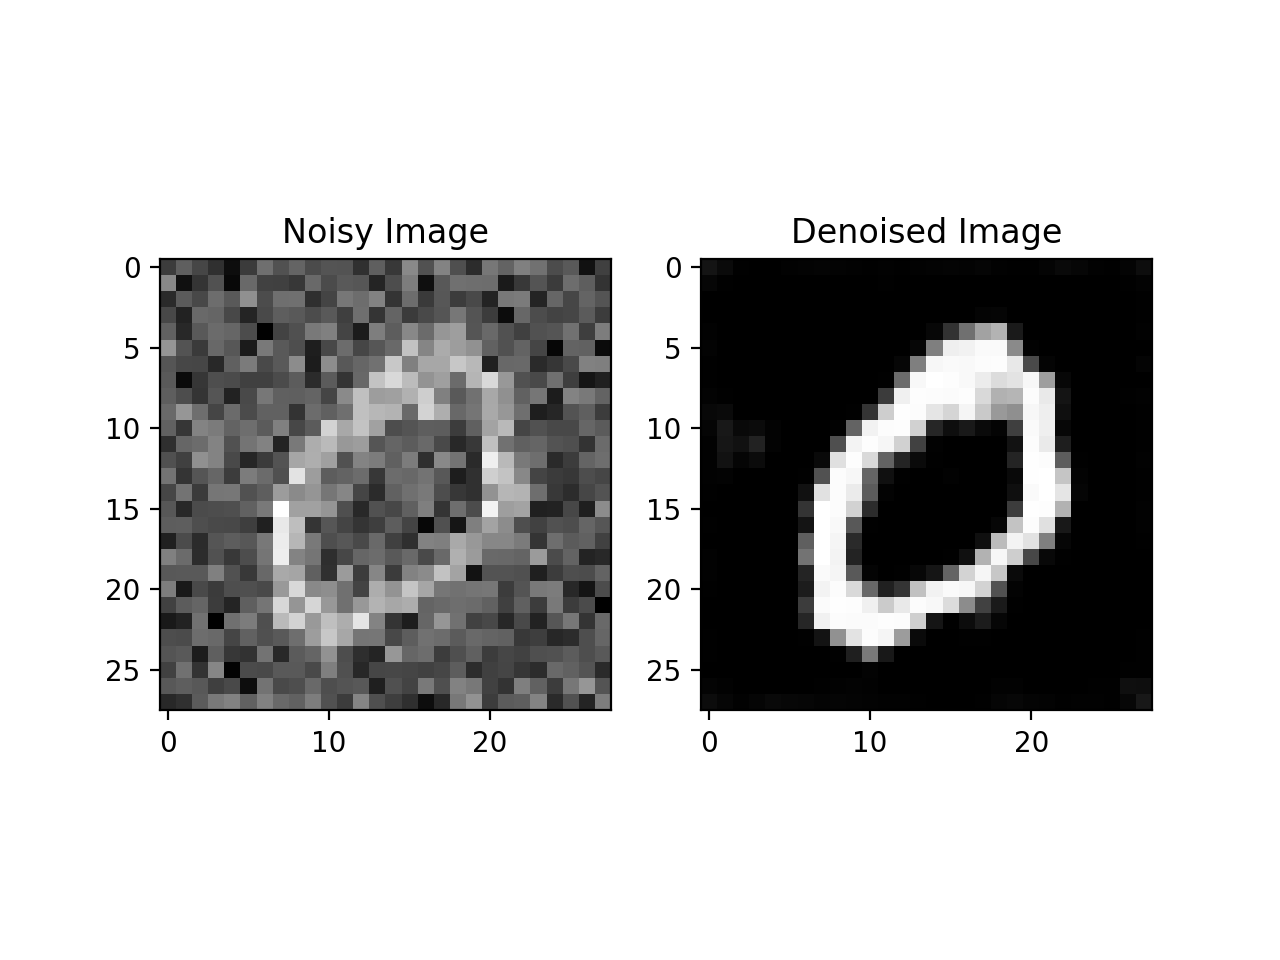

<IPython.core.display.Javascript object>


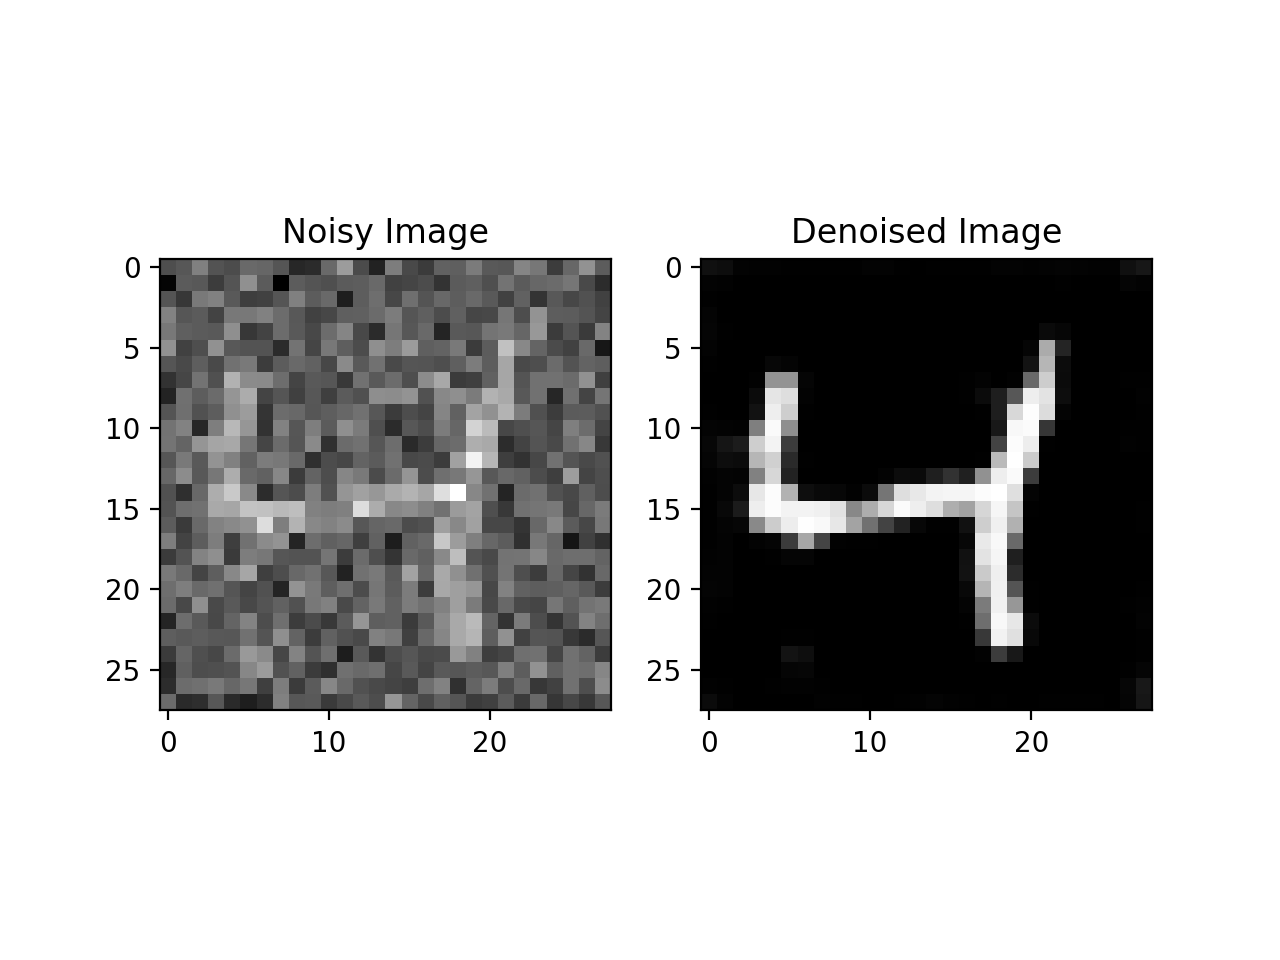

<IPython.core.display.Javascript object>


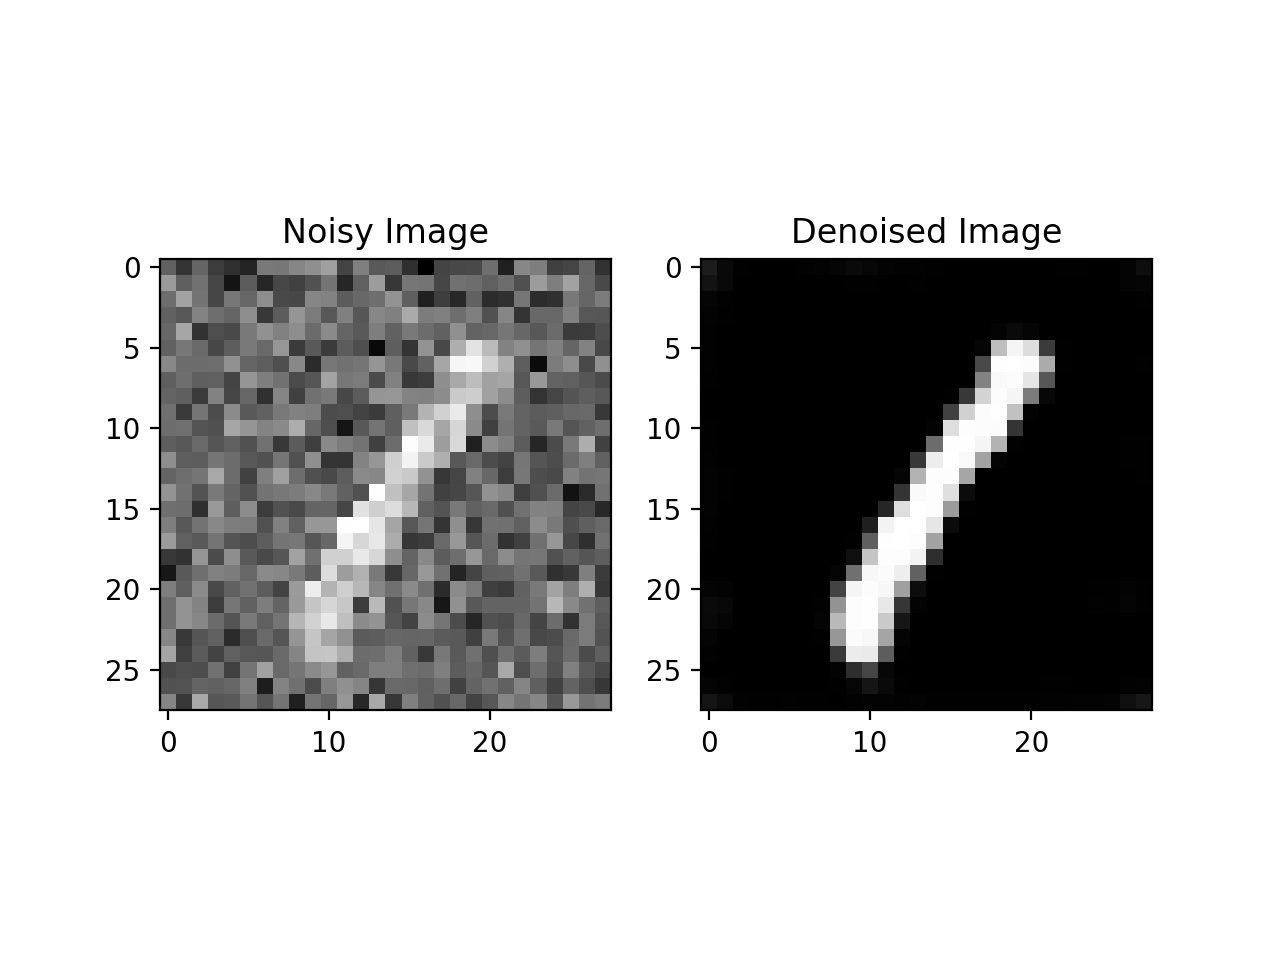

<IPython.core.display.Javascript object>


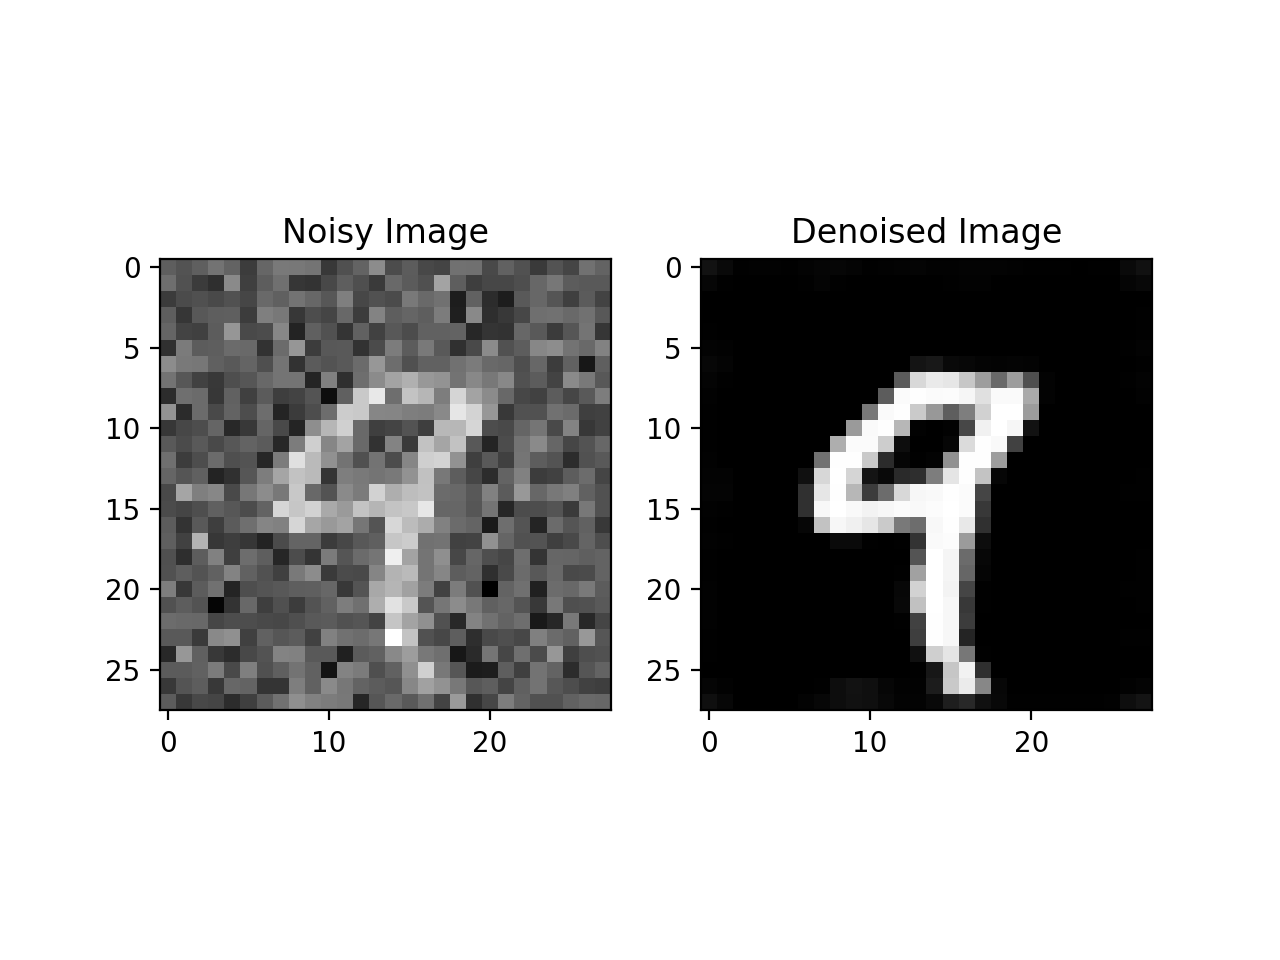

<IPython.core.display.Javascript object>


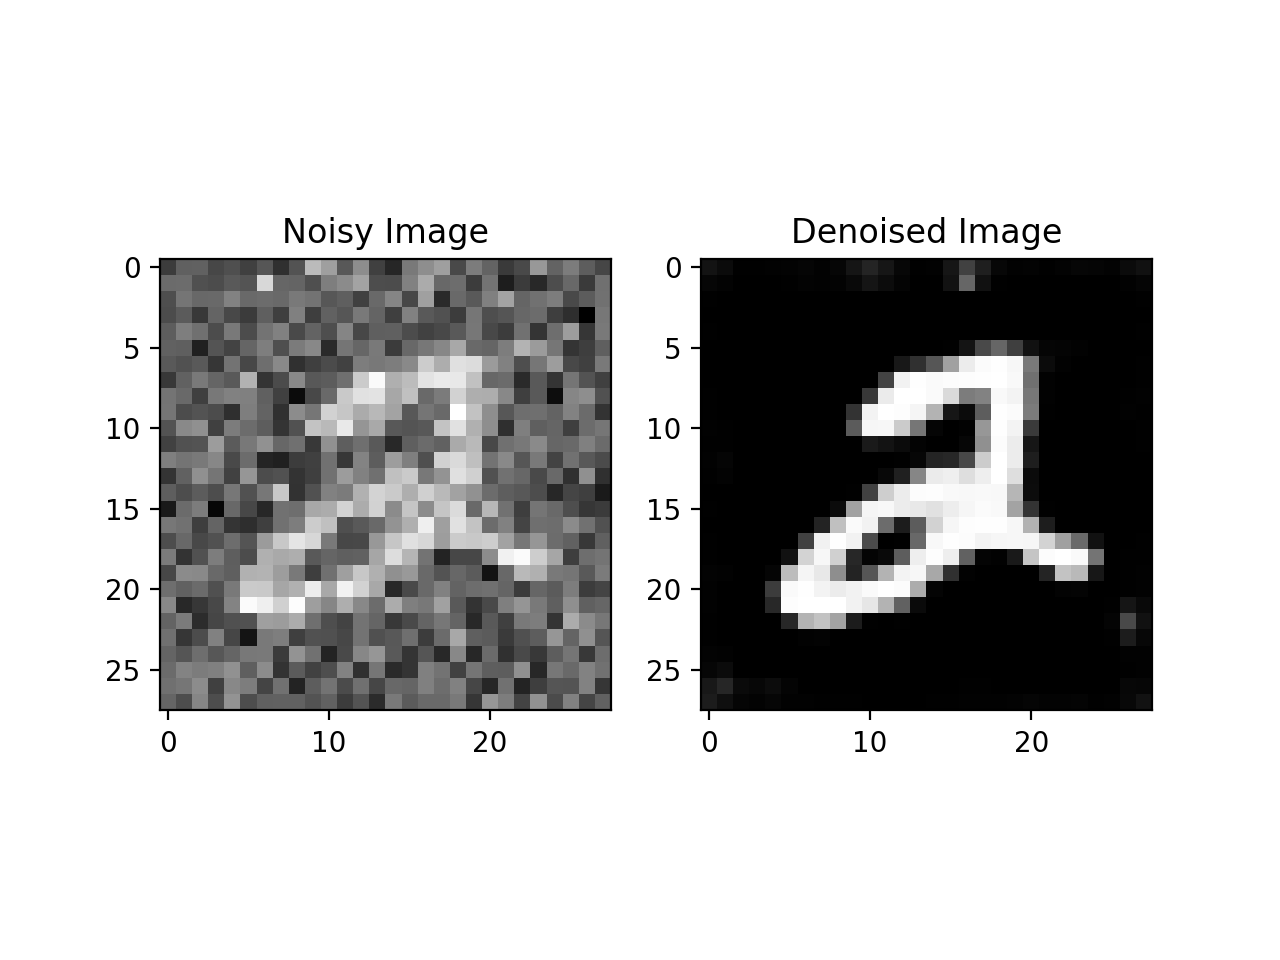

<IPython.core.display.Javascript object>


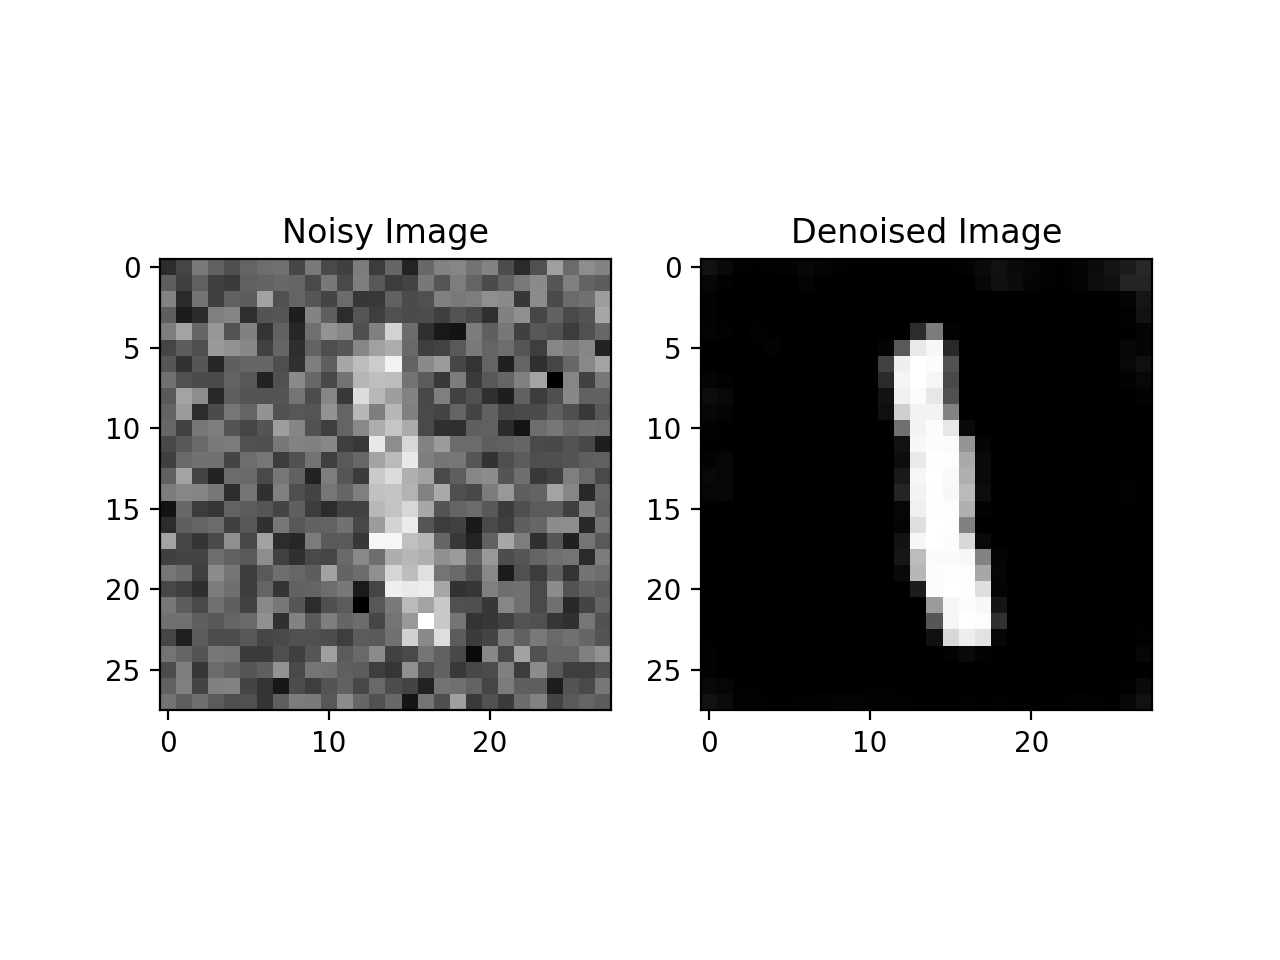

<IPython.core.display.Javascript object>


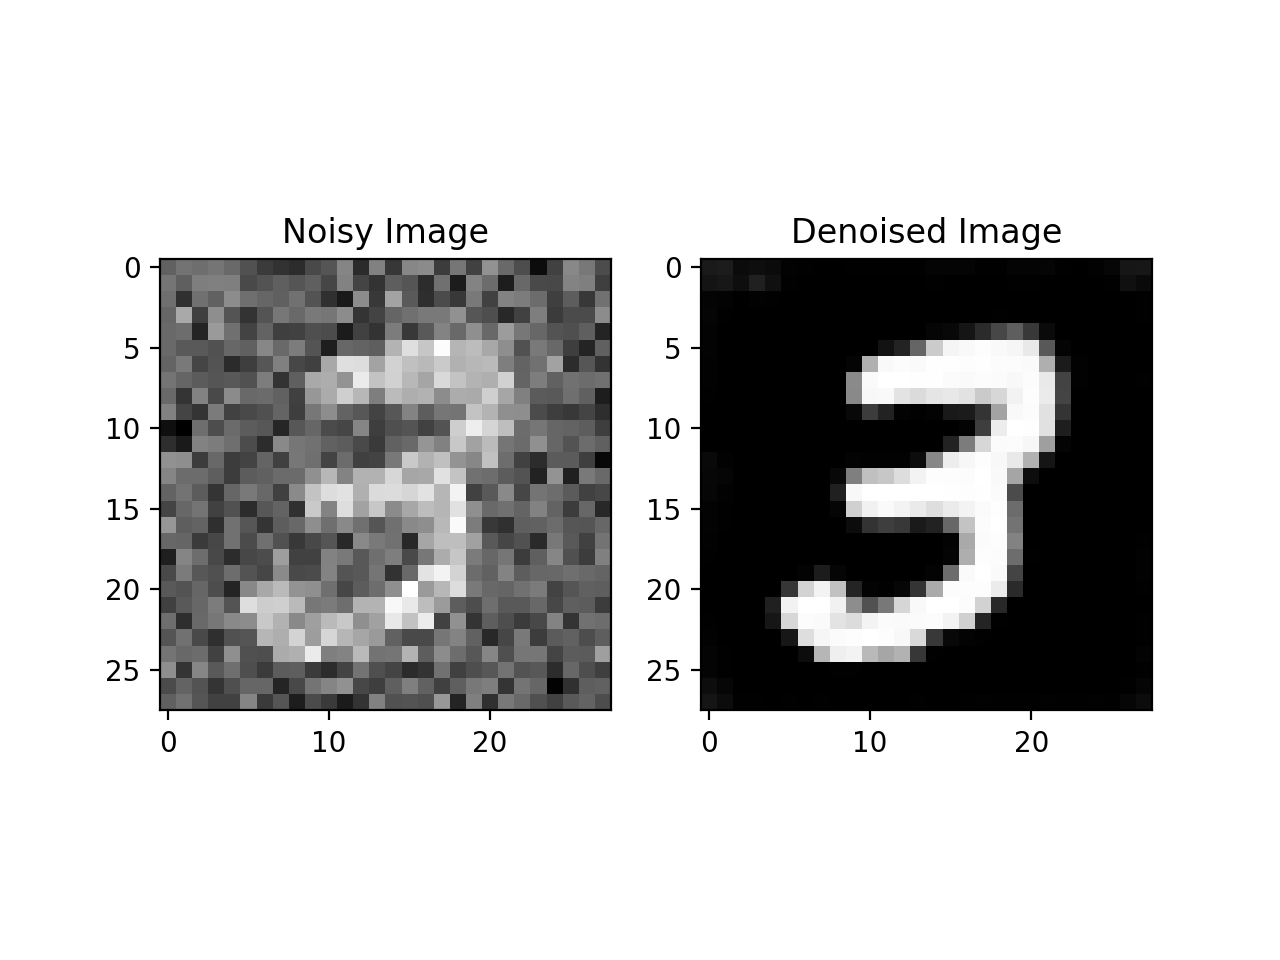

<IPython.core.display.Javascript object>


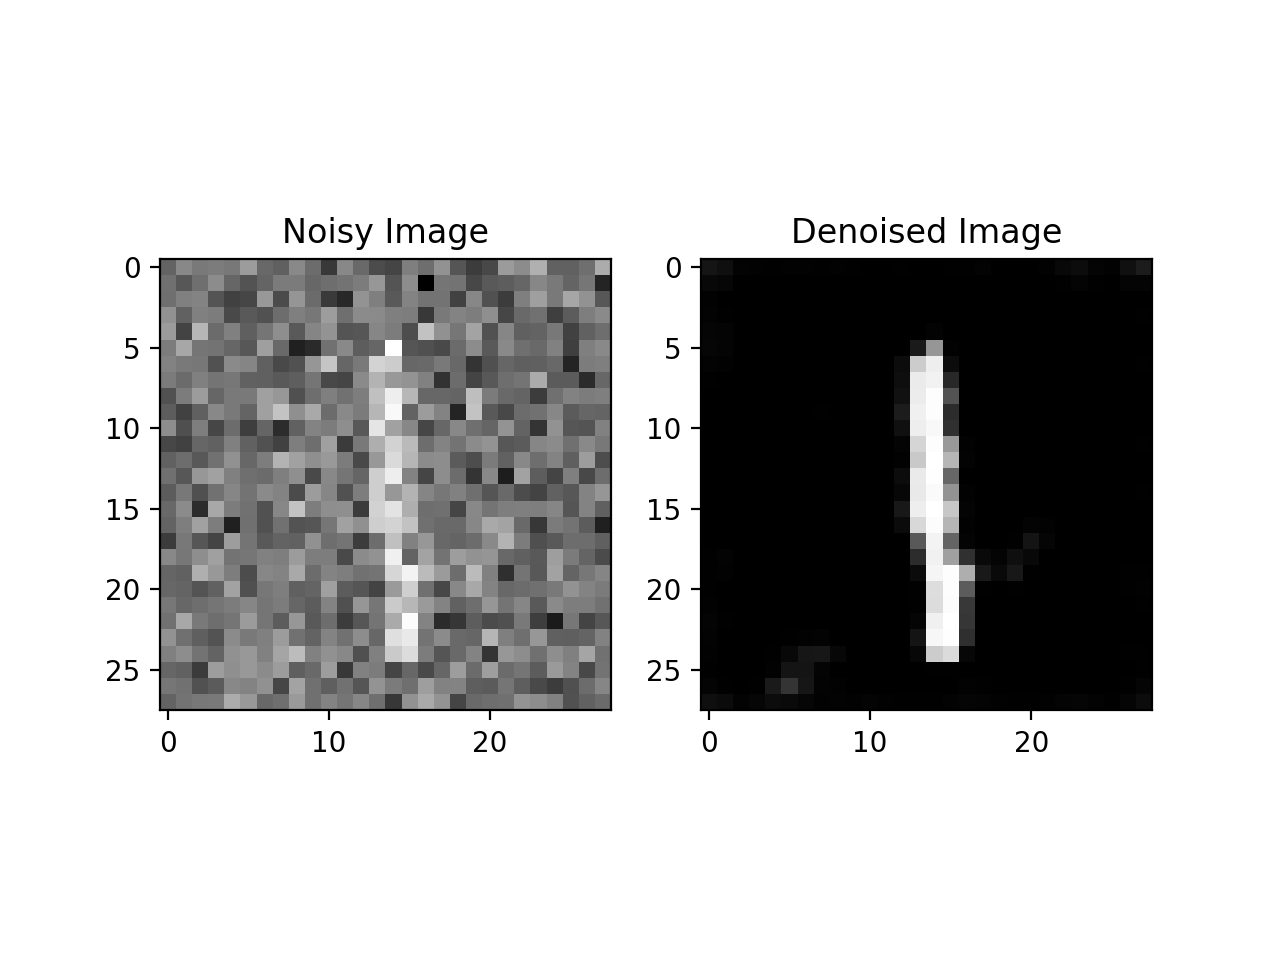

<IPython.core.display.Javascript object>


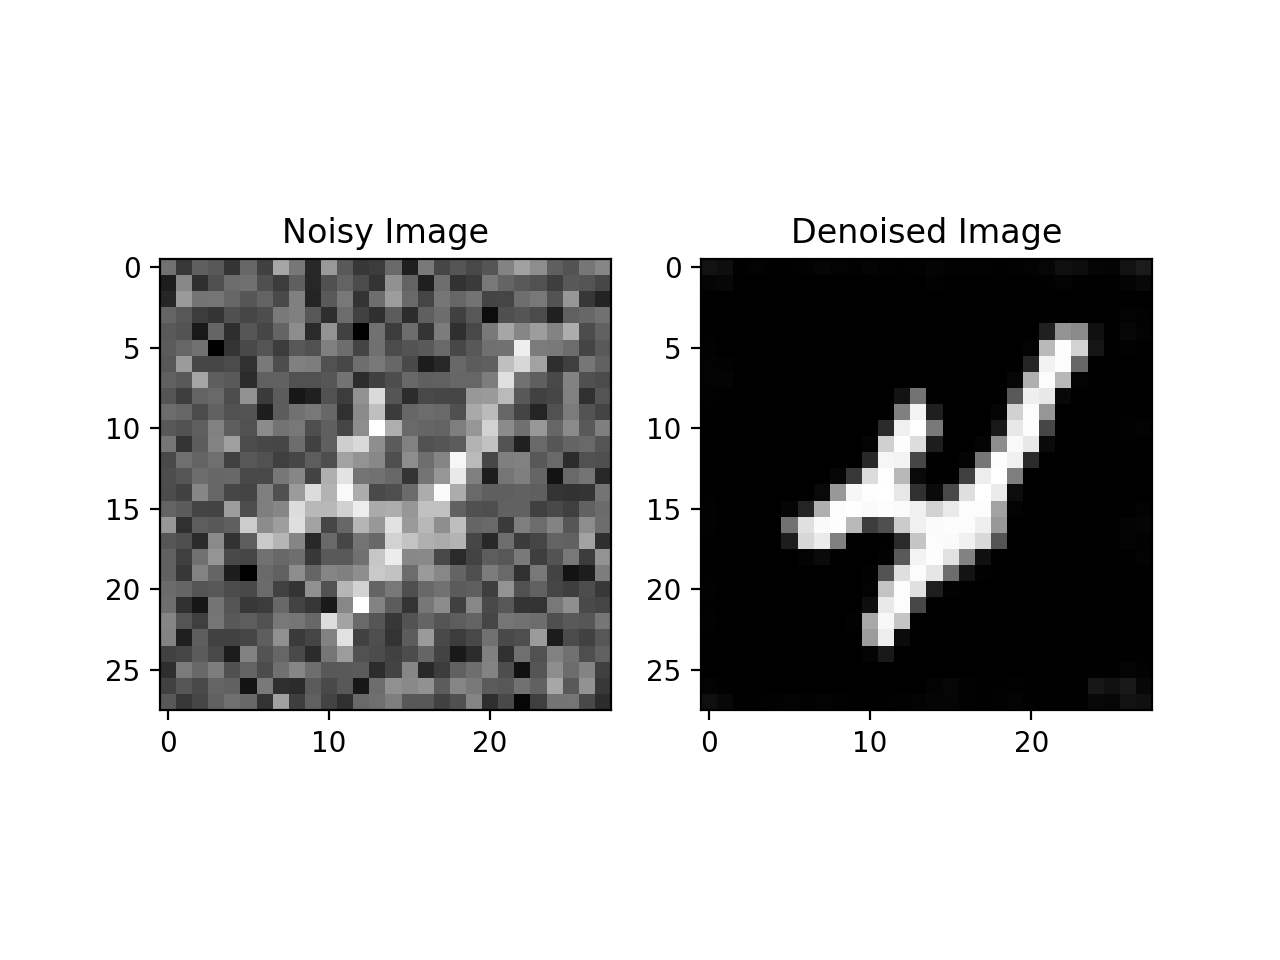

<IPython.core.display.Javascript object>


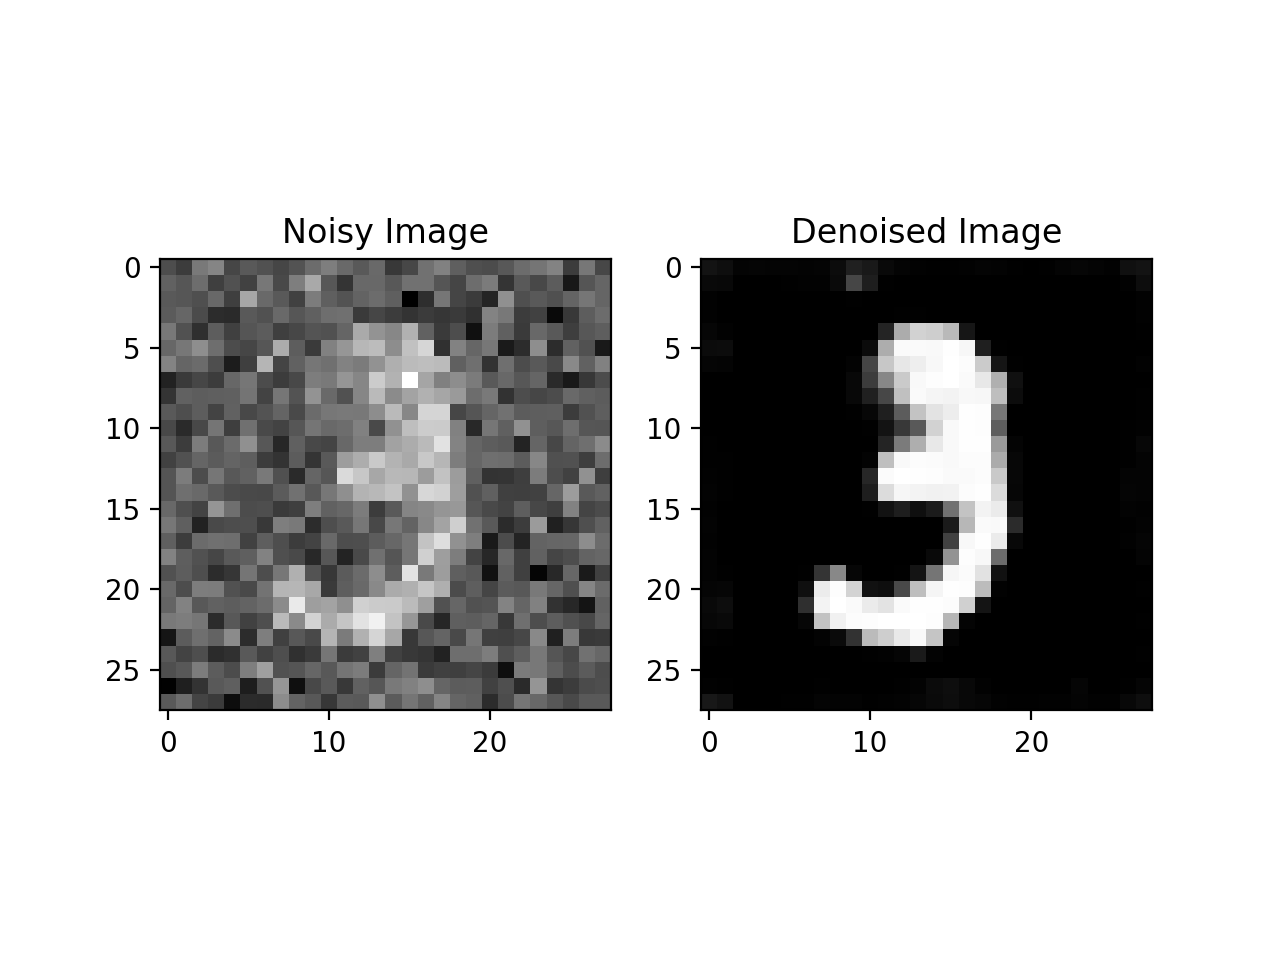

In [244]:
# Choose ten examples
examples = X_train_tensor[:10]

# Reshape into images to be passed through a CAE
examples = examples.view(examples.size(0), 1, 28, 28)

# Generate Gaussian noise
noise = torch.tensor(np.random.randn(examples.size(0), 784)).view(-1, 1, 28, 28).type(torch.FloatTensor)

# Add Gaussian noise to images
examples_noise = examples + 0.3 * noise

# Pass through CAE
predictions = ae(examples_noise)

predictions = predictions.view(-1, 28, 28)

for i in range(10):
    fig, ax = plt.subplots(1, 2)
    ax[0].imshow(examples_noise[i].view(28, 28), cmap='gray')
    ax[0].set_title('Noisy Image')
    ax[1].imshow(predictions[i].detach().numpy(), cmap='gray')
    ax[1].set_title('Denoised Image')
    plt.show()


In [207]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader, TensorDataset
      

class AutoEncoder(nn.Module):
    '''
    A class representing a fully-connect AutoEncoder.
    '''
    def __init__(self, encoded_dimension):
        super().__init__()
        self.encoder = nn.Sequential(
                nn.Linear(784, 64),
                nn.ReLU(),
                nn.BatchNorm1d(64),
                nn.Linear(64, encoded_dimension),
                nn.ReLU()
        )
        
        self.decoder = nn.Sequential(
                nn.BatchNorm1d(encoded_dimension),
                nn.Linear(encoded_dimension, 64),
                nn.ReLU(),
                nn.BatchNorm1d(64),
                nn.Linear(64, 784),
                nn.Sigmoid()
            )
                

    def forward(self, x):
        self.encoded = self.encoder(x)
        self.decoded = self.decoder(self.encoded)
        
        return self.decoded

In [218]:
# Read the data in
data = pd.read_csv('./data/mnist_train.csv')

# Extract the X and y training data and normalise.
X_train = data[data.columns[1:]].as_matrix()/255
y_train = data['5'].as_matrix()

# Convert into PyTorch tensors.
X_train_tensor = torch.Tensor(X_train)
y_train_tensor = torch.Tensor(y_train)

# Define the batch size and number of epochs.
batch_size = 64
epochs = 10

# Create data loader.
train_data = TensorDataset(X_train_tensor, y_train_tensor)
train_data_loader = DataLoader(train_data, batch_size, shuffle=True)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [219]:
# Instantiate AutoEncoder
ae = AutoEncoder(2)

# Instantiate Loss
criterion = nn.BCELoss()

# Instantiate Adam Optimiser
optimizer = torch.optim.Adam(ae.parameters())

Epoch 0: loss = 0.224401
Epoch 1: loss = 0.221204
Epoch 2: loss = 0.208035
Epoch 3: loss = 0.205716
Epoch 4: loss = 0.212403
Epoch 5: loss = 0.215897
Epoch 6: loss = 0.201717
Epoch 7: loss = 0.217455
Epoch 8: loss = 0.192721
Epoch 9: loss = 0.206127


<IPython.core.display.Javascript object>


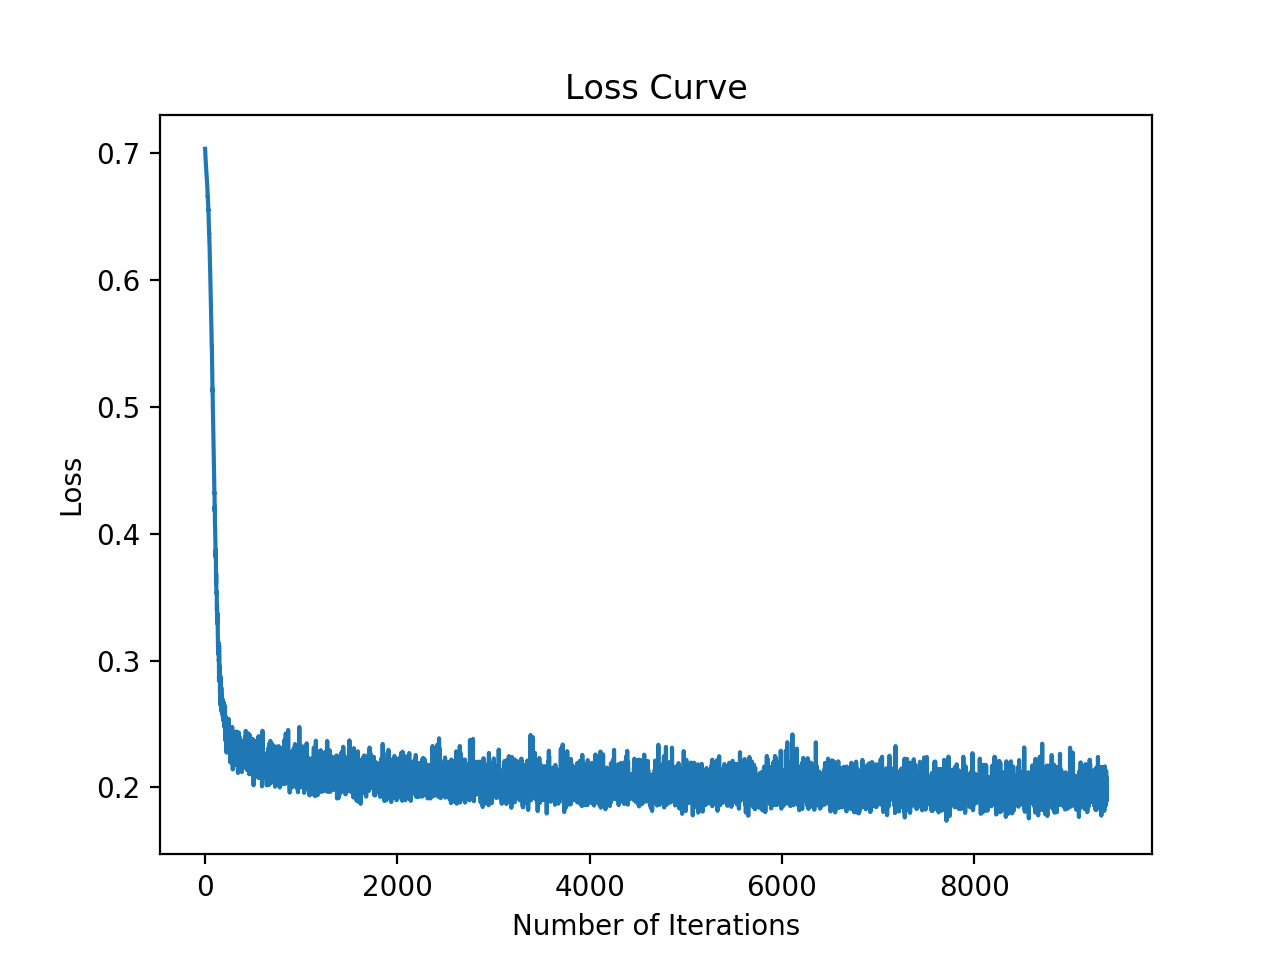

In [220]:
%matplotlib notebook
losses = []

# For each epoch
for epoch in range(epochs):
    
    # For each batch in the data loader
    for features, labels in train_data_loader:
        # Flatten the features
        flatten_features = features.view(features.size(0), -1)
        
        # Pass through the AutoEncoder
        output = ae(flatten_features)

        # Reset optimiser gradients
        optimizer.zero_grad()
        
        # Calculate loss between AE output and input
        loss = criterion(output, flatten_features)
        
        # Calculate gradients
        loss.backward()
        
        # Update Parameters
        optimizer.step()
        
        losses.append(loss)
    
    print('Epoch %d: loss = %f' % (epoch, loss))
    
plt.plot(range(len(losses)), losses)
plt.title('Loss Curve')
plt.xlabel('Number of Iterations')
plt.ylabel('Loss')
plt.show()

<IPython.core.display.Javascript object>


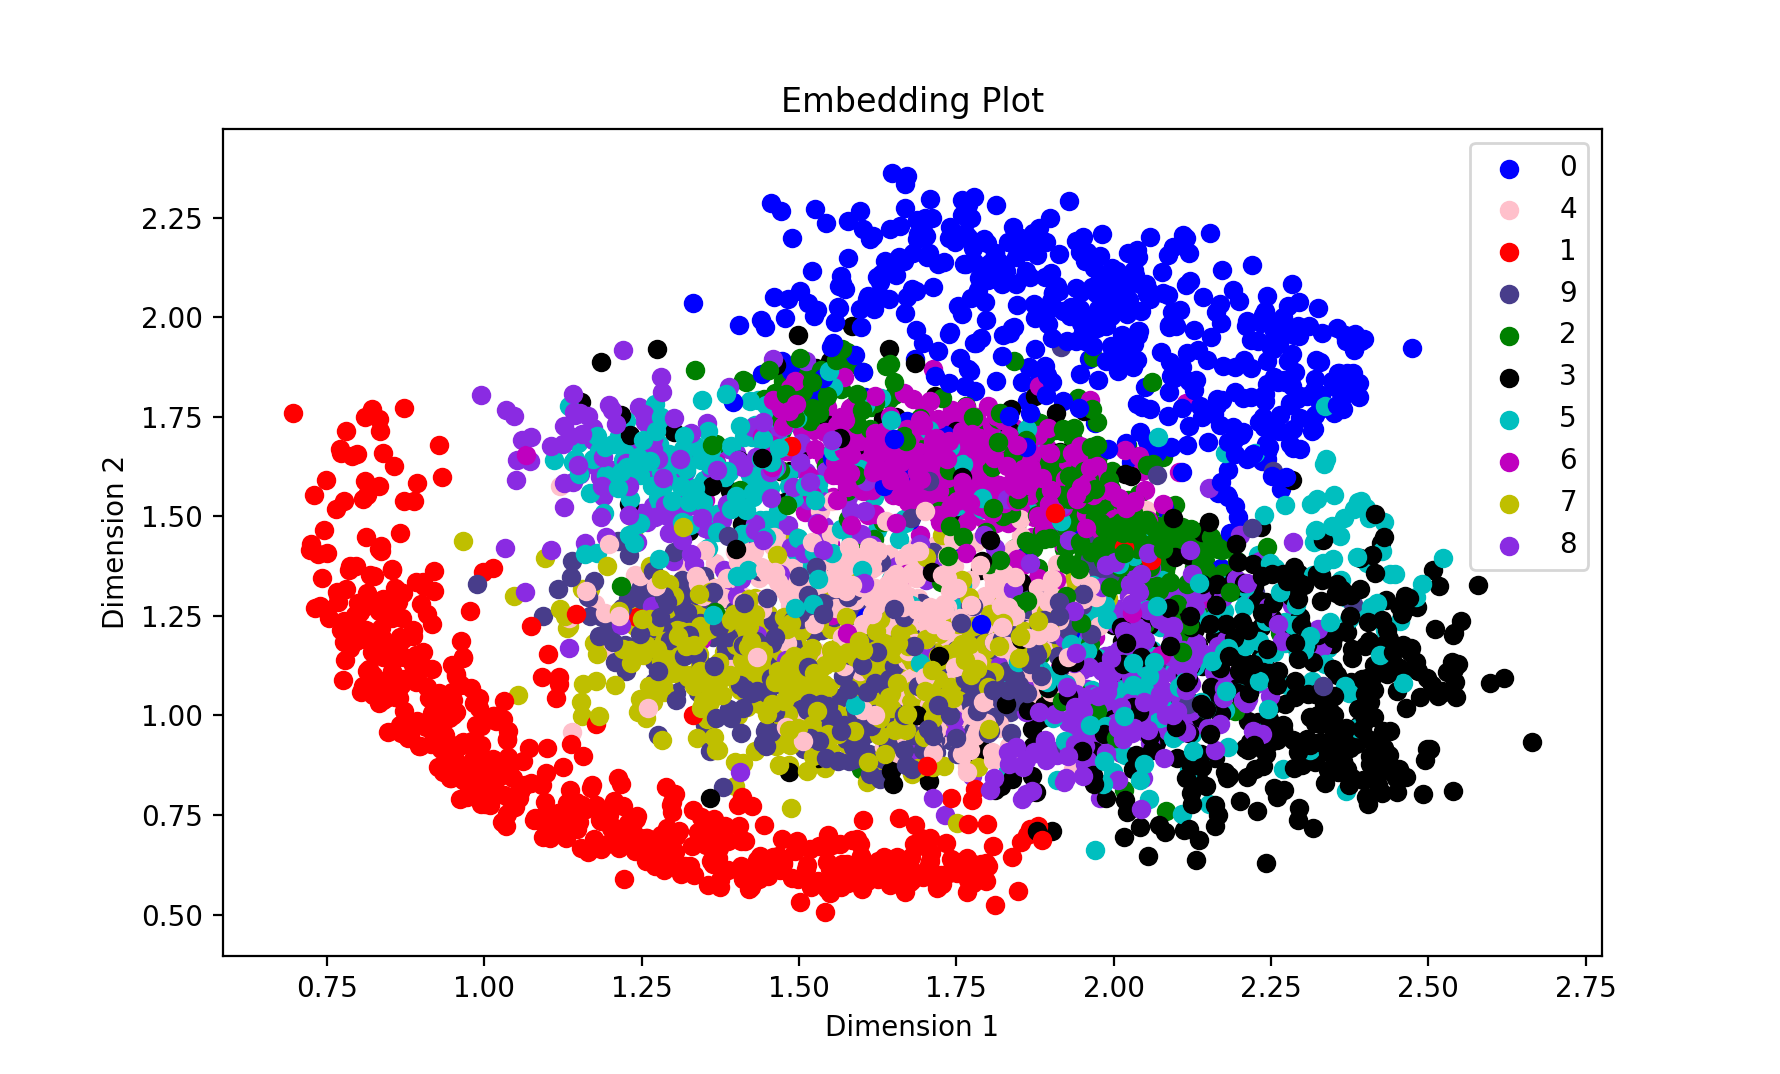

In [221]:
%matplotlib notebook
import collections

# Extract ten examples
X = X_train_tensor[:5000]
y = y_train_tensor[:5000]

# Flatten the ten examples
X_flatten = X.view(X.size(0), -1)

# Pass them through the trained AE.
predictions = ae(X_flatten)

# Extract their encodings
encodings = ae.encoded

encodings = encodings
predictions = predictions.view(-1, 28, 28)

colors = ['b', 'r', 'g', 'k', 'pink', 'c', 'm', 'y', 'blueviolet', 'darkslateblue']


color_seen = collections.defaultdict(int)

# Display Image, Reconstruction, and Encoding
for i in range(5000):
    if color_seen[int(y[i])] == 0:
        color_seen[int(y[i])] += 1
        plt.scatter(encodings.detach().numpy()[i][0], encodings.detach().numpy()[i][1], color=colors[int(y[i])], label=int(y[i]))
    
    plt.scatter(encodings.detach().numpy()[i][0], encodings.detach().numpy()[i][1], color=colors[int(y[i])])
    
    
plt.title('Embedding Plot')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.show()

In [226]:
# Extract the X and y training data and normalise.
X_train = data[data.columns[1:]].as_matrix()/255
y_train = data['5'].as_matrix()

# Convert into PyTorch tensors.
X_train_tensor = torch.Tensor(X_train)
y_train_tensor = torch.Tensor(y_train)

# Define the batch size and number of epochs.
batch_size = 64
epochs = 10

# Create data loader.
train_data = TensorDataset(X_train_tensor, y_train_tensor)
train_data_loader = DataLoader(train_data, batch_size, shuffle=True)

# Instantiate AutoEncoder
ae = AutoEncoder(3)

# Instantiate Loss
criterion = nn.BCELoss()

# Instantiate Adam Optimiser
optimizer = torch.optim.Adam(ae.parameters())

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


Epoch 0: loss = 0.217015
Epoch 1: loss = 0.203857
Epoch 2: loss = 0.181589
Epoch 3: loss = 0.186097
Epoch 4: loss = 0.222170
Epoch 5: loss = 0.195451
Epoch 6: loss = 0.183022
Epoch 7: loss = 0.170614
Epoch 8: loss = 0.203950
Epoch 9: loss = 0.169663


<IPython.core.display.Javascript object>


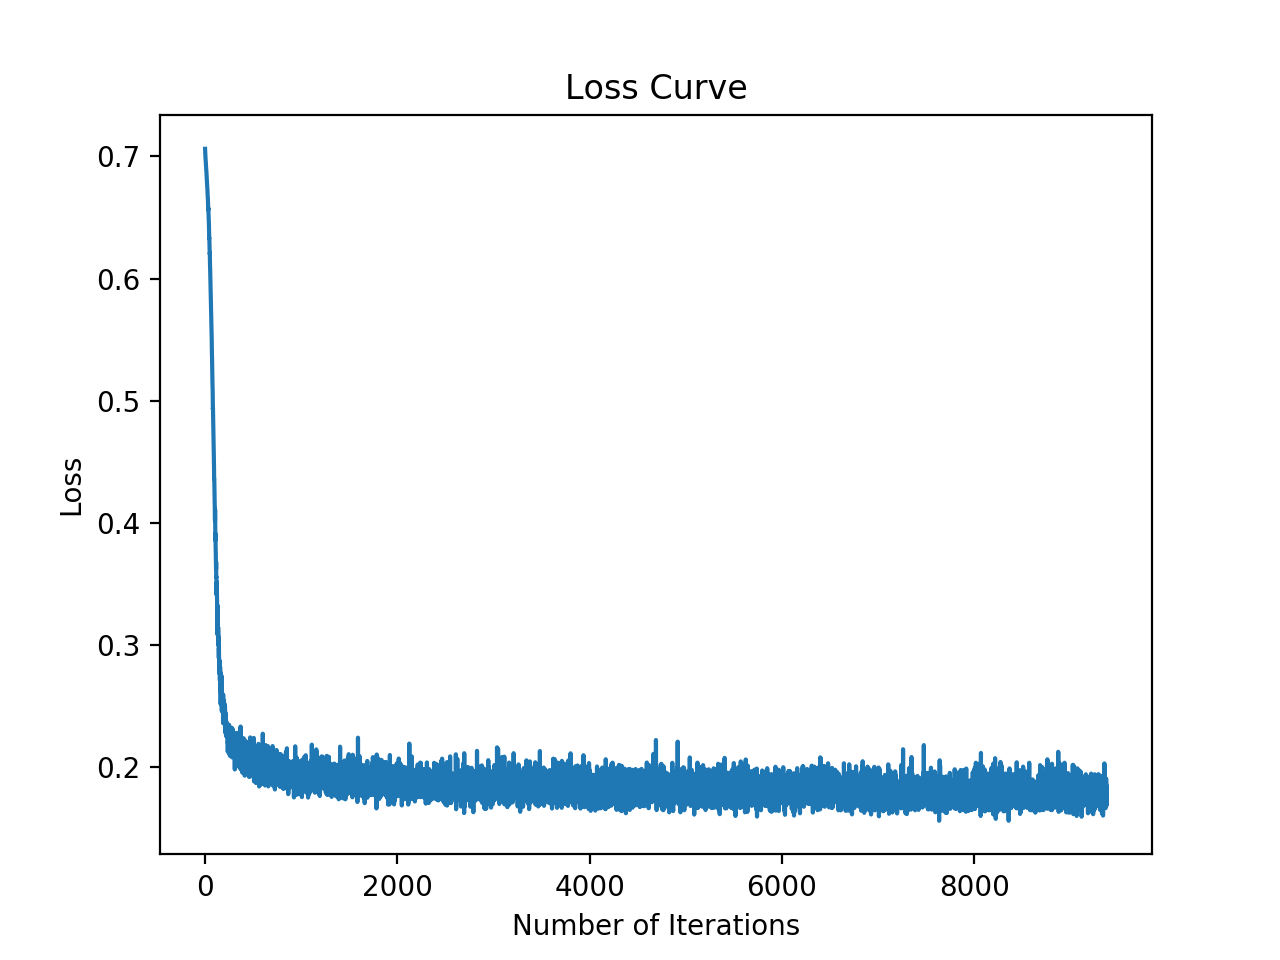

In [227]:
%matplotlib notebook
losses = []

# For each epoch
for epoch in range(epochs):
    
    # For each batch in the data loader
    for features, labels in train_data_loader:
        # Flatten the features
        flatten_features = features.view(features.size(0), -1)
        
        # Pass through the AutoEncoder
        output = ae(flatten_features)

        # Reset optimiser gradients
        optimizer.zero_grad()
        
        # Calculate loss between AE output and input
        loss = criterion(output, flatten_features)
        
        # Calculate gradients
        loss.backward()
        
        # Update Parameters
        optimizer.step()
        
        losses.append(loss)
    
    print('Epoch %d: loss = %f' % (epoch, loss))
    
plt.plot(range(len(losses)), losses)
plt.title('Loss Curve')
plt.xlabel('Number of Iterations')
plt.ylabel('Loss')
plt.show()

<IPython.core.display.Javascript object>


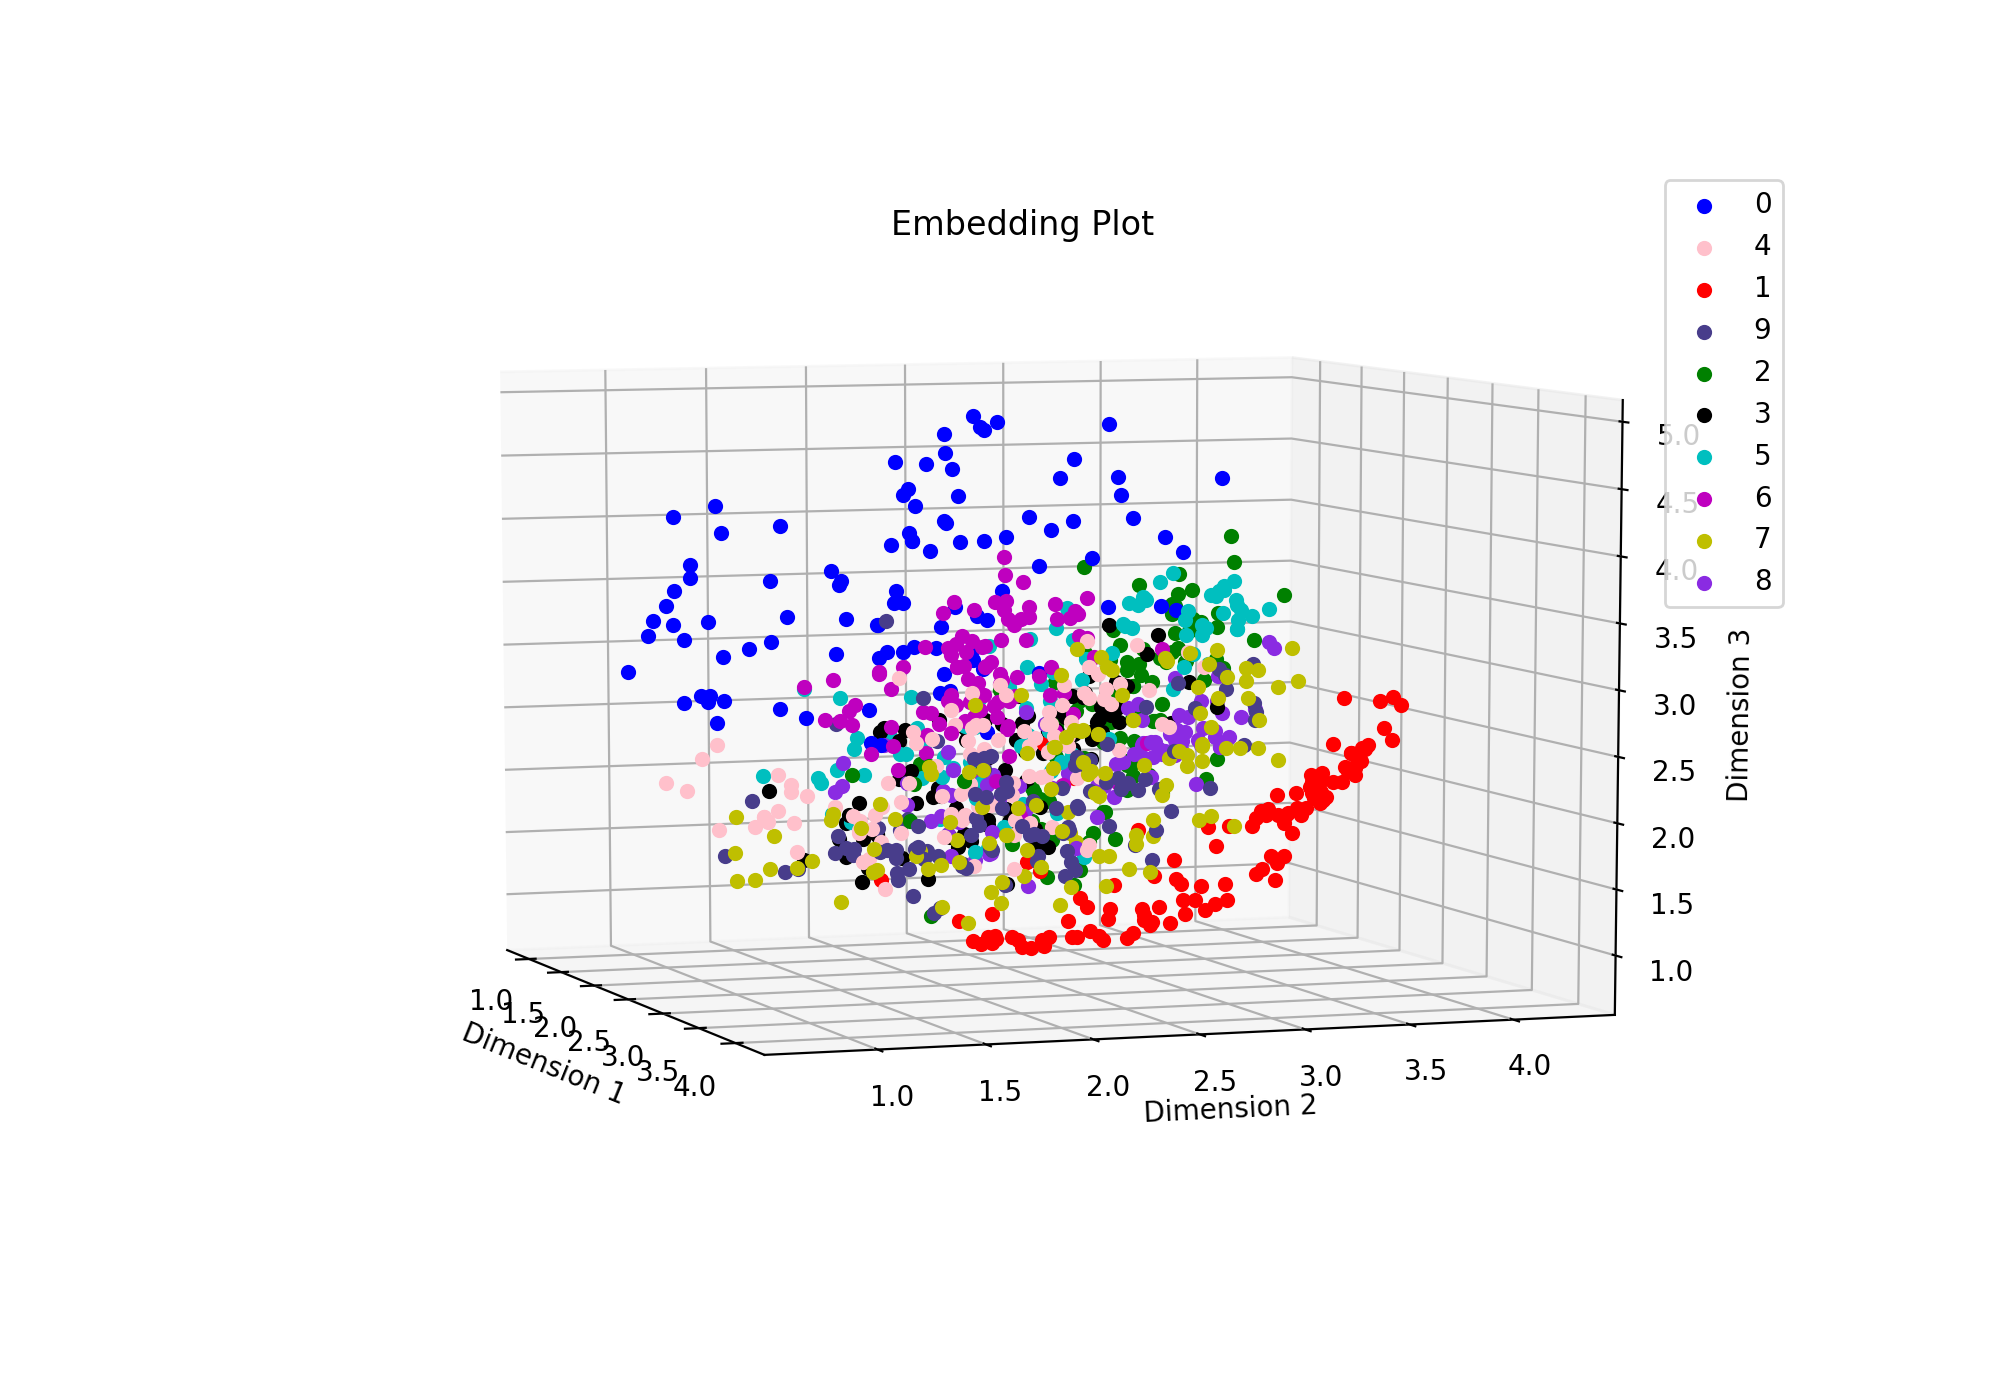

In [228]:
%matplotlib notebook
import collections
from mpl_toolkits.mplot3d import Axes3D

# Extract ten examples
X = X_train_tensor[:10000]
y = y_train_tensor[:10000]

# Flatten the ten examples
X_flatten = X.view(X.size(0), -1)

# Pass them through the trained AE.
predictions = ae(X_flatten)

# Extract their encodings
encodings = ae.encoded

encodings = encodings
predictions = predictions.view(-1, 28, 28)

colors = ['b', 'r', 'g', 'k', 'pink', 'c', 'm', 'y', 'blueviolet', 'darkslateblue']


color_seen = collections.defaultdict(int)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# Display Image, Reconstruction, and Encoding
for i in range(1000):
    if color_seen[int(y[i])] == 0:
        color_seen[int(y[i])] += 1
        ax.scatter(encodings.detach().numpy()[i][0], encodings.detach().numpy()[i][1], encodings.detach().numpy()[i][2], color=colors[int(y[i])], label=int(y[i]))
    
    ax.scatter(encodings.detach().numpy()[i][0], encodings.detach().numpy()[i][1], encodings.detach().numpy()[i][2], color=colors[int(y[i])])
    
    
ax.set_title('Embedding Plot')
ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_zlabel('Dimension 3')
plt.legend()
plt.show()